# Telco Customer Churn

created by : Ryandri Alif Pratomoputra - JCDS 2304

Berikut merupakan gambaran umum dari projek akhir ini:

A. Identifikasi Masalah Bisnis

B. Pemahaman Terhadap Data

C. Analisis Data Eksploratif (EDA)

D. Pra-pemrosesan Data

E. Analisis Data

F. Penerapan Machine Learning

G. Kesimpulan

H. Rekomendasi dan Saran

## Identifikasi Masalah Bisnis

Perusahaan telekomunikasi menghadapi tantangan signifikan dalam mempertahankan pelanggannya. Churn pelanggan, atau hilangnya pelanggan yang beralih ke penyedia layanan lain, merupakan masalah bisnis kritis yang dapat mengurangi pendapatan dan keuntungan perusahaan secara signifikan. Tingkat churn yang tinggi juga dapat mengindikasikan masalah mendasar dalam layanan, dukungan pelanggan, atau penawaran produk.

# Goals

1. Mengurangi Tingkat Churn Pelanggan: 
Tujuan utama adalah mengembangkan strategi untuk mengurangi tingkat churn pelanggan secara signifikan. Hal ini dapat dilakukan dengan mengidentifikasi faktor-faktor yang menyebabkan pelanggan beralih dan mengambil langkah-langkah untuk mempertahankan mereka.

2. Meningkatkan Kepuasan Pelanggan: 
Fokus pada meningkatkan layanan, dukungan pelanggan, dan kualitas produk untuk meningkatkan kepuasan pelanggan secara keseluruhan. Hal ini diharapkan dapat mengurangi motivasi pelanggan untuk beralih ke penyedia layanan lain.

# Analytic Goals 
analisis akan dilakukan untuk mencari pola perilaku yang mengindikasikan apakah pelanggan cenderung untuk berhenti berlangganan atau tetap setia. Selanjutnya, kami akan membangun sebuah model klasifikasi untuk memprediksi probabilitas bahwa seorang pelanggan akan melakukan churn atau tidak. Model ini akan membantu perusahaan dalam mengantisipasi dan mengelola potensi churn dengan lebih efektif.

# Metric Evaluation

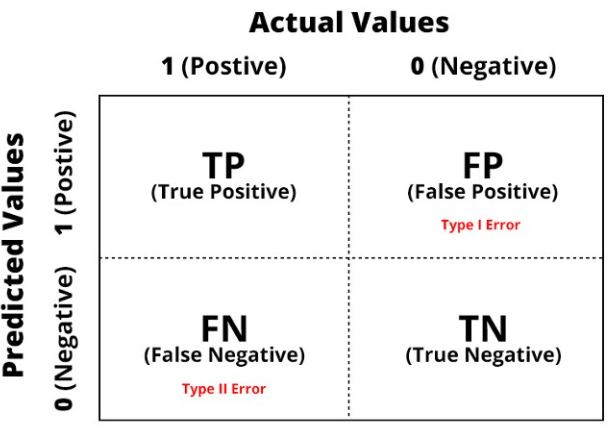

Type 1 error : False Positive
Konsekuensi: biaya marketing yang terbuang sia-sia.

Type 2 error : False Negative
Konsekuensi: kehilangan customer loyal.

False Negative memiliki dampak yang lebih merugikan dibandingkan dengan False Positive. Kesalahan False Negative berarti model gagal mengidentifikasi pelanggan yang sebenarnya akan melakukan churn, sehingga perusahaan kehilangan kesempatan untuk melakukan tindakan pencegahan seperti strategi retensi. Hal ini dapat mengakibatkan kehilangan pelanggan yang seharusnya dapat dipertahankan, yang pada akhirnya berarti biaya pemasaran yang telah dikeluarkan untuk mendapatkan pelanggan tersebut menjadi sia-sia. Dengan demikian, kehilangan pelanggan dapat berdampak langsung pada pendapatan perusahaan dan juga meningkatkan biaya akuisisi pelanggan baru.

In [77]:
# Standard Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno
from IPython.display import display

# Model Selection and Evaluation Modules
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay

# Preprocessing and Transformation Modules
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from category_encoders import BinaryEncoder

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from xgboost import XGBRegressor


# Imbalance Handling Methods
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN

# Running Time Module
import time

# Ignore Warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [72]:
df_awal=pd.read_csv('data_telco_customer_churn.csv')
df_awal

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [3]:
df_awal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


# Data Understanding

In [4]:
# Membuat dataframe dengan keterangan tiap kolom
data_under = pd.DataFrame({
    'Kolom': ['Dependents', 'Tenure', 'OnlineSecurity', 'OnlineBackup',
              'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
              'MonthlyCharges', 'Churn'],
    'Keterangan': ['Apakah pelanggan memiliki tanggungan atau tidak',
                   'Jumlah bulan pelanggan telah bergabung dengan perusahaan',
                   'Apakah pelanggan memiliki keamanan online atau tidak',
                   'Apakah pelanggan memiliki cadangan online atau tidak',
                   'Apakah pelanggan berlangganan layanan internet',
                   'Apakah customer memiliki device protection atau tidak',
                   'Apakah customer memilki tech support atau tidak',
                   'Jenis kontrak berdasarkan durasi',
                   'Apakah customer memiliki paperless billing',
                   'Jumlah biaya layanan per bulan ($)',
                   'Apakah pelanggan berhenti berlangganan atau tidak'],
    'Example Values': ['Yes/No', 'Integer', 'Yes/No', 'Yes/No', 'DSL, Fiber optic, etc.',
                       'Yes/No', 'Yes/No', 'Month-to-month, One year, Two year',
                       'Yes/No', 'Numeric', 'Yes/No']
})

# Menampilkan dataframe ket_kolom
data_under

,Kolom,Keterangan,Example Values
0,Dependents,Apakah pelanggan memiliki tanggungan atau tidak,Yes/No
1,Tenure,Jumlah bulan pelanggan telah bergabung dengan ...,Integer
2,OnlineSecurity,Apakah pelanggan memiliki keamanan online atau...,Yes/No
3,OnlineBackup,Apakah pelanggan memiliki cadangan online atau...,Yes/No
4,InternetService,Apakah pelanggan berlangganan layanan internet,"DSL, Fiber optic, etc."
5,DeviceProtection,Apakah customer memiliki device protection ata...,Yes/No
6,TechSupport,Apakah customer memilki tech support atau tidak,Yes/No
7,Contract,Jenis kontrak berdasarkan durasi,"Month-to-month, One year, Two year"
8,PaperlessBilling,Apakah customer memiliki paperless billing,Yes/No
9,MonthlyCharges,Jumlah biaya layanan per bulan ($),Numeric


In [5]:
# Menghapus data yang duplikat dari DataFrame dan menghitung jumlah duplikat yang dihapus
duplicate_count = len(df_awal) - len(df_awal.drop_duplicates())

# Mencetak jumlah duplikat data yang dihapus
print("Jumlah duplikat data yang dihapus:", duplicate_count)

Jumlah duplikat data yang dihapus: 77


In [6]:
# Menghapus data yang duplikat dari DataFrame
df_cleaned = df_awal.drop_duplicates()
df_cleaned.head(3)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes


In [7]:
# Menghitung jumlah data yang duplikat
jumlah_duplikat = df_cleaned.duplicated().sum()

# Mencetak jumlah data yang duplikat
print("Jumlah data yang duplikat adalah:", jumlah_duplikat)

Jumlah data yang duplikat adalah: 0


># Melihat Distribusi Data

In [8]:
# Mengetahui fitur yang numerikal
num_features = [feature for feature in df_cleaned.columns if ((df_cleaned[feature].dtypes != 'O'))]
num_features

['tenure', 'MonthlyCharges']

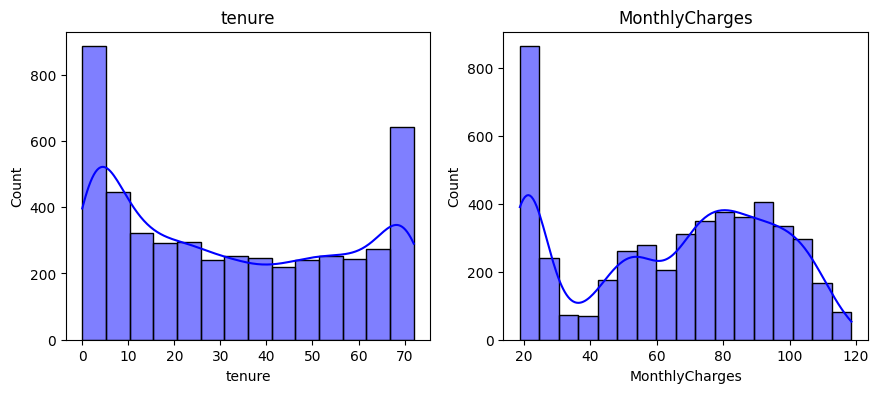

In [9]:
plotnumber = 1

plt.figure(figsize=(16,4))

for cols in num_features:
    plt.subplot(1, 3, plotnumber)
    sns.histplot(data=df_cleaned, x=cols, kde=True, color='blue')
    plt.title(cols)
    plotnumber += 1

plt.show()

In [10]:
# cek anomali sebaran
df_cleaned[num_features].describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


In [11]:
df_cleaned[df_cleaned['tenure']==0]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
82,Yes,0,No,Yes,DSL,Yes,Yes,Two year,No,73.35,No
325,Yes,0,Yes,No,DSL,Yes,Yes,Two year,Yes,52.55,No
1053,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.35,No
2017,Yes,0,Yes,Yes,DSL,Yes,No,Two year,No,80.85,No
2902,Yes,0,Yes,Yes,DSL,No,Yes,Two year,Yes,61.90,No
3410,Yes,0,Yes,Yes,DSL,Yes,Yes,Two year,No,56.05,No
4192,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.25,No
4441,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.85,No


># Memeriksa Korelasi 

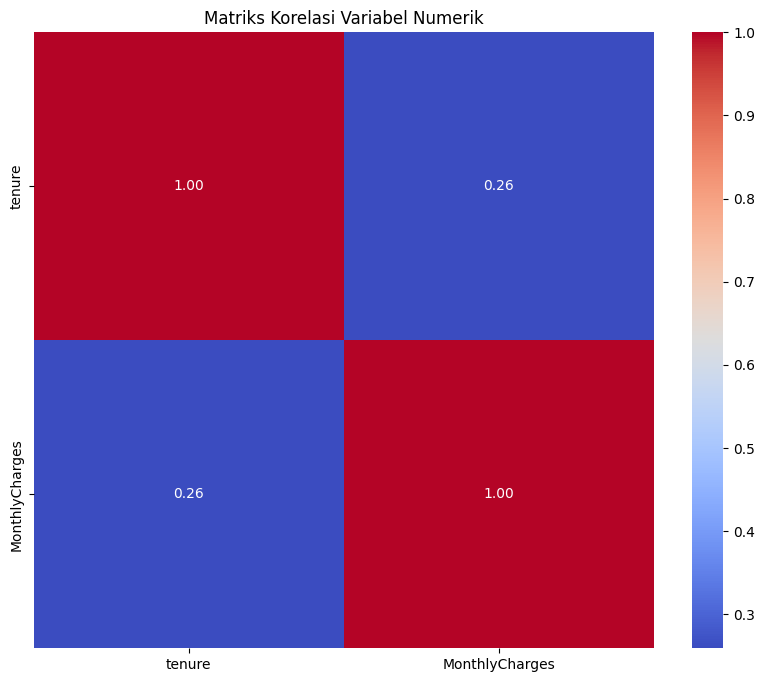

In [12]:
# Mengambil hanya variabel numerik dari dataframe
df_numerik = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi menggunakan metode Spearman
corrMatrix = df_numerik.corr(method='spearman')

# Menampilkan matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

># Handling data Irelevant

In [13]:
# 1. Periksa nilai unik
print("Unique values in OnlineSecurity:", df_cleaned['OnlineSecurity'].unique())
print("Unique values in OnlineBackup:", df_cleaned['OnlineBackup'].unique())
print("Unique values in DeviceProtection:", df_cleaned['DeviceProtection'].unique())
print("Unique values in TechSupport:", df_cleaned['TechSupport'].unique())

Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['No' 'Yes' 'No internet service']
Unique values in DeviceProtection: ['Yes' 'No internet service' 'No']
Unique values in TechSupport: ['Yes' 'No' 'No internet service']


In [14]:
# Daftar kolom yang ingin diubah
columns_to_update = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Mengganti nilai 'No internet service' dengan 'No' untuk setiap kolom yang dipilih
for column in columns_to_update:
    df_cleaned[column] = df_cleaned[column].replace({'No internet service': 'No'})

# Cetak nilai unik setelah perubahan
for column in columns_to_update:
    print(f"Unique values in {column}:", df_cleaned[column].unique())

Unique values in OnlineSecurity: ['No' 'Yes']
Unique values in OnlineBackup: ['No' 'Yes']
Unique values in DeviceProtection: ['Yes' 'No']
Unique values in TechSupport: ['Yes' 'No']


Disini saya menyatukan 'No internet service' dan 'No' menjadi satu value karena memiliki arti sama dan memudahkan untuk di analisis supaya tidak memiliki value lebih banyak dan menjadikan lebih rapih 


In [15]:
# Daftar kolom yang ingin diubah
columns_to_update = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Inisialisasi list untuk menyimpan data
data = []

# Mengganti nilai 'No internet service' dengan 'No' untuk setiap kolom yang dipilih
for column in columns_to_update:
    df_cleaned[column] = df_cleaned[column].replace({'No internet service': 'No'})

    # Menambahkan nama kolom dan nilai uniknya ke dalam list data
    unique_values = df_cleaned[column].unique()
    data.append([column, unique_values])

# Membuat DataFrame dari list data
df_table = pd.DataFrame(data, columns=['Kolom', 'Nilai Unik'])

# Mencetak tabel
print("Tabel Nilai Unik Setelah Perubahan:")
df_table

Tabel Nilai Unik Setelah Perubahan:


,Kolom,Nilai Unik
0,OnlineSecurity,"[No, Yes]"
1,OnlineBackup,"[No, Yes]"
2,DeviceProtection,"[Yes, No]"
3,TechSupport,"[Yes, No]"


># Bivariat Numerik Kolom

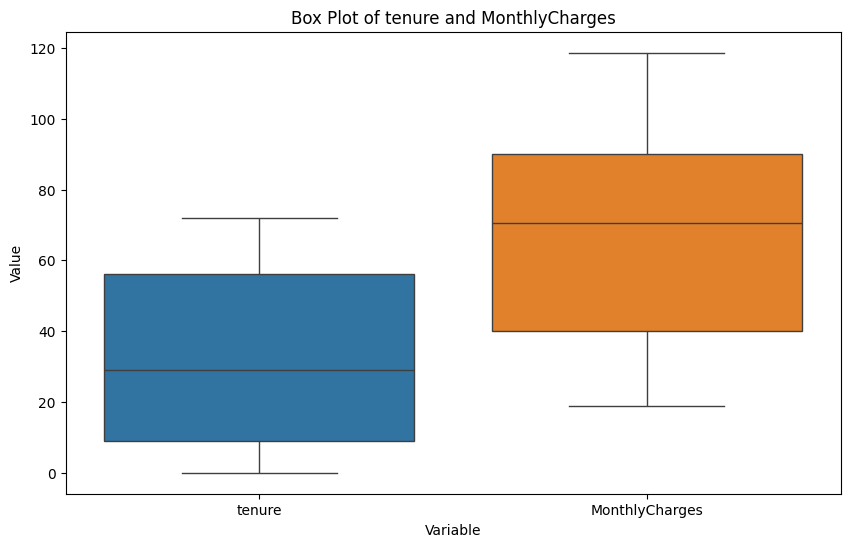

In [16]:
# Box plot untuk 'tenure' dan 'MonthlyCharges'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['tenure', 'MonthlyCharges']])
plt.title('Box Plot of tenure and MonthlyCharges')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(ticks=[0, 1], labels=['tenure', 'MonthlyCharges'])
plt.show()

># Melihat Besaran Churn Menggunakan Pie Chart

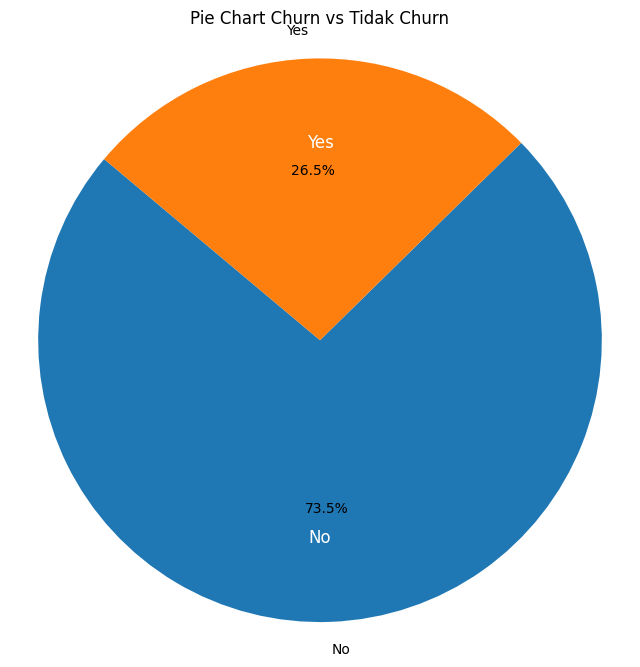

In [17]:
# Menghitung jumlah kemunculan masing-masing nilai
churn_counts = df_cleaned['Churn'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Churn vs Tidak Churn')

# Menambahkan label "Yes" dan "No" di dalam pie chart
plt.text(0, 0.7, 'Yes', fontsize=12, color='white', horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='none', edgecolor='none'))
plt.text(0, -0.7, 'No', fontsize=12, color='white', horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='none', edgecolor='none'))

plt.axis('equal')  # Membuat lingkaran menjadi proporsional
plt.show()

># Univariat untuk kolom Numerik

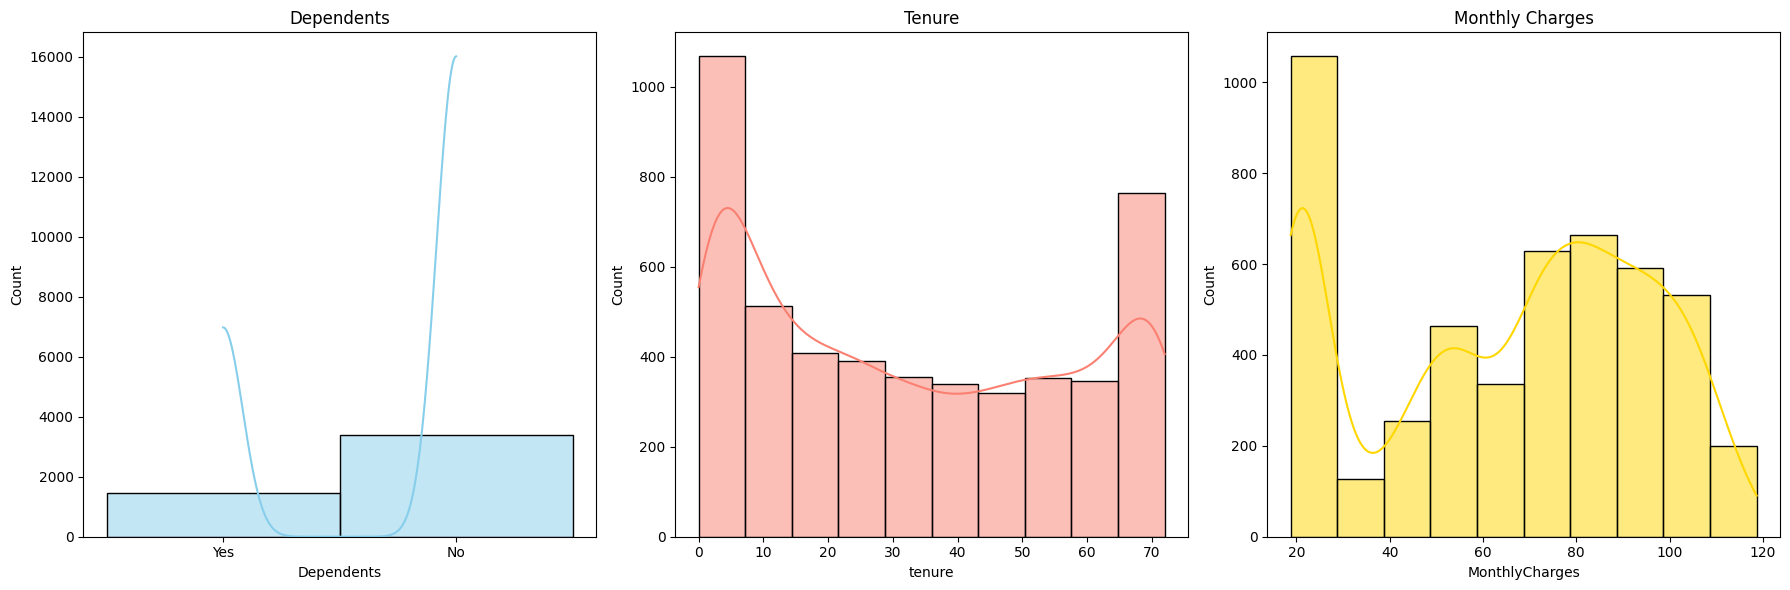

In [18]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['Dependents'], bins=5, kde=True, color='skyblue')
plt.title('Dependents')

plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['tenure'], bins=10, kde=True, color='salmon')
plt.title('Tenure')

plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['MonthlyCharges'], bins=10, kde=True, color='gold')
plt.title('Monthly Charges')

plt.tight_layout()
plt.show()

># Univariat Kolom Kategorikal

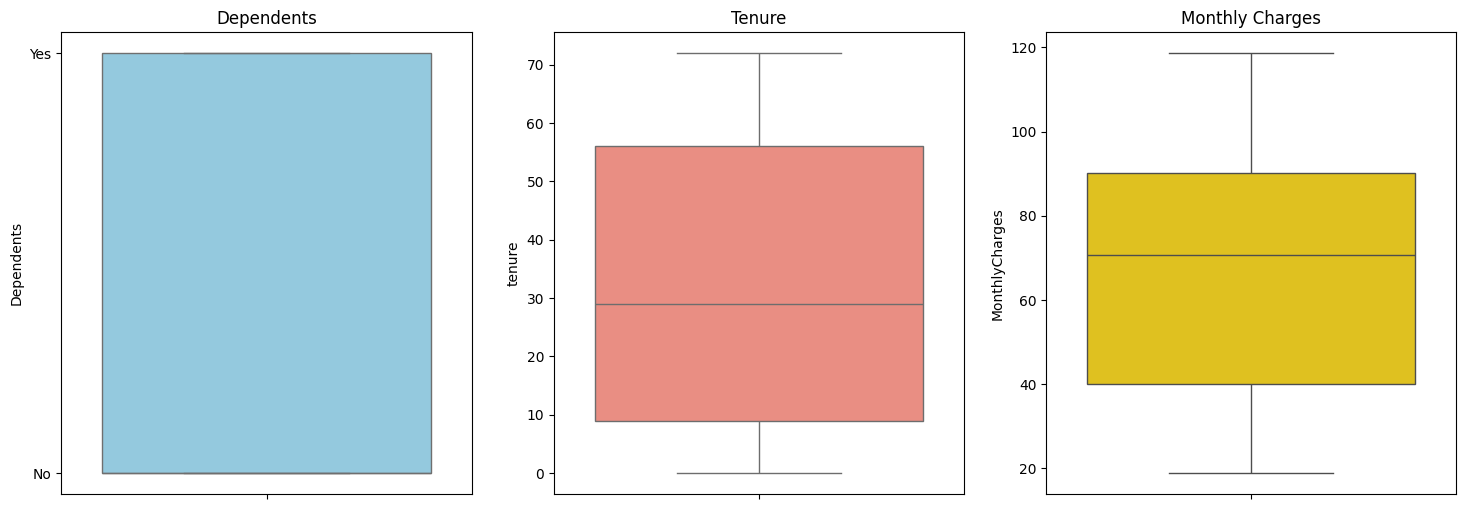

In [19]:
plt.figure(figsize=(18, 6))

# Boxplots
plt.subplot(1, 3, 1)
sns.boxplot(y=df_cleaned['Dependents'], color='skyblue')
plt.title('Dependents')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_cleaned['tenure'], color='salmon')
plt.title('Tenure')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_cleaned['MonthlyCharges'], color='gold')
plt.title('Monthly Charges')

plt.show()

># Cek Bivariat Kategorikal

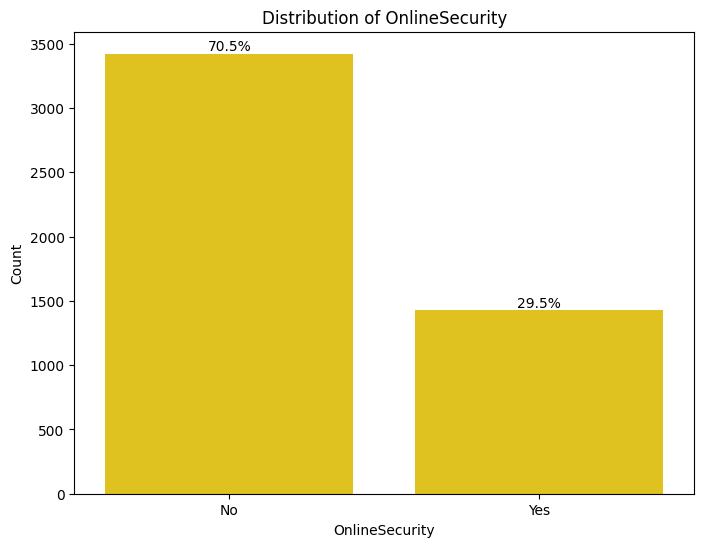

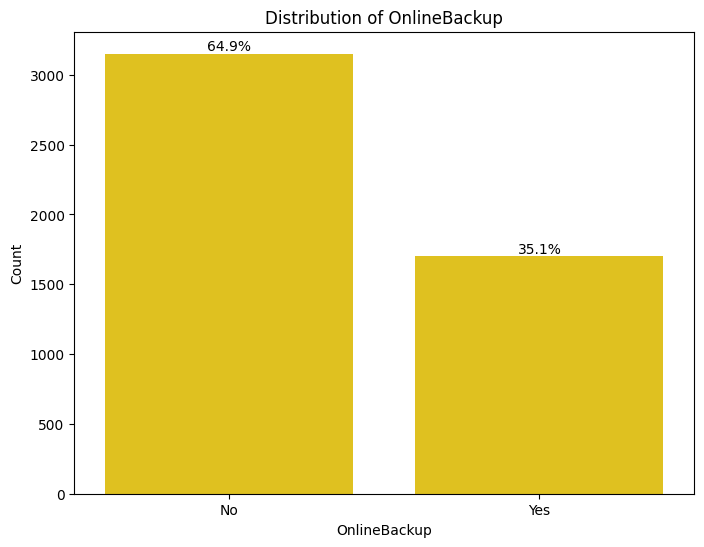

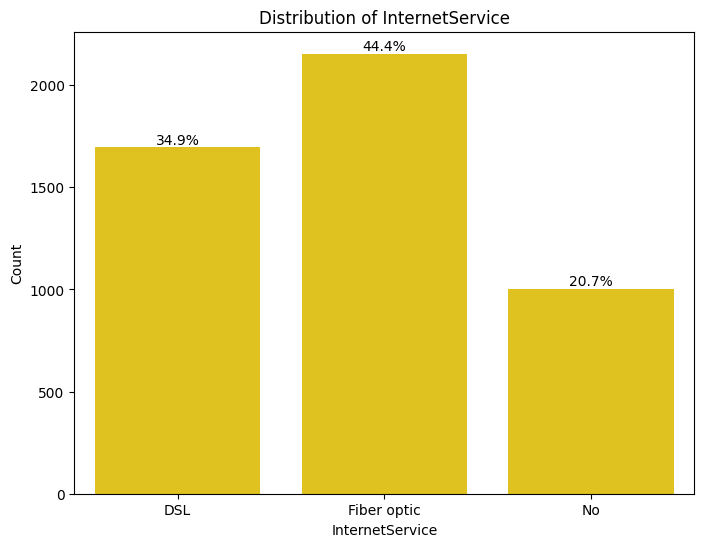

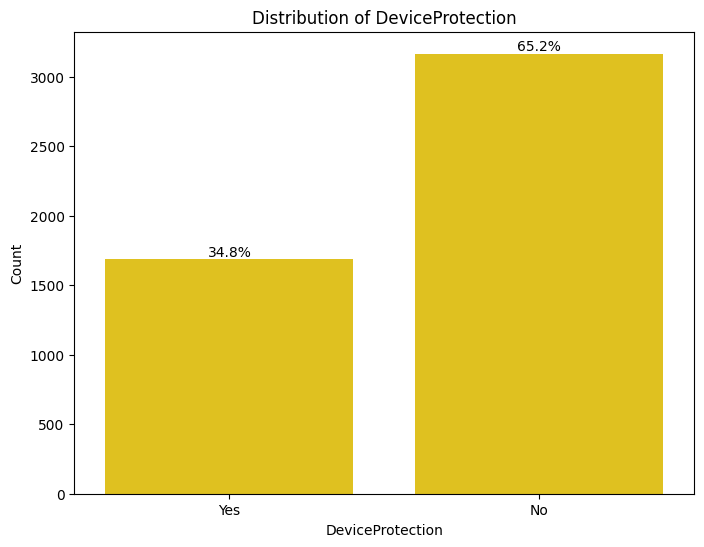

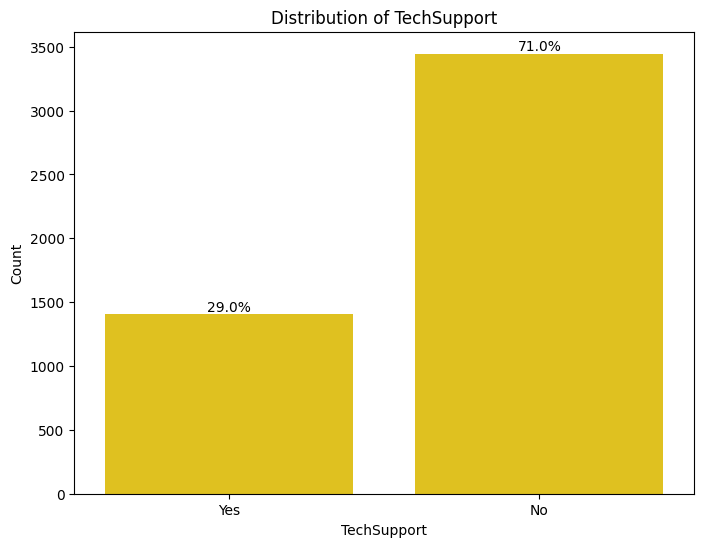

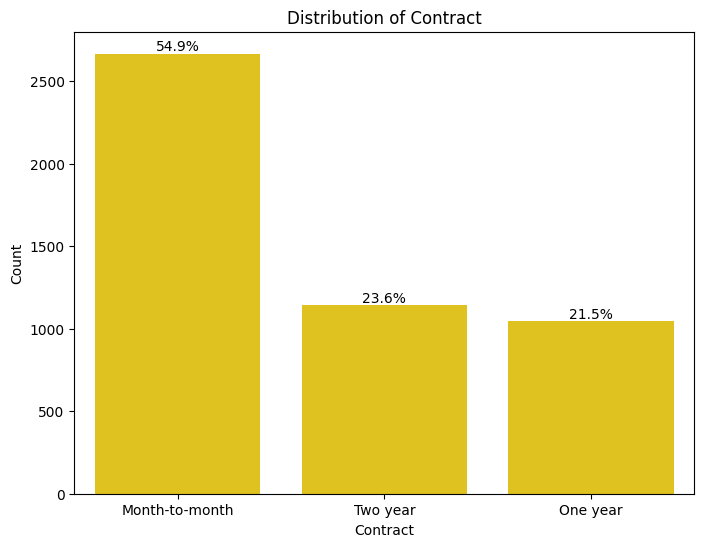

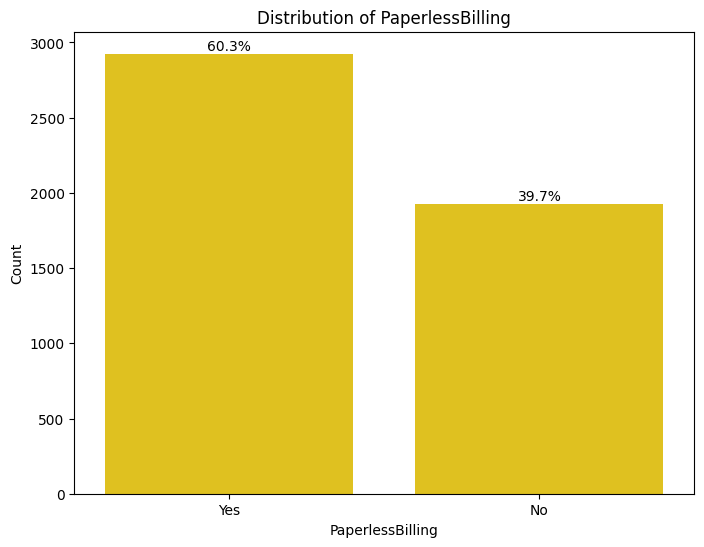

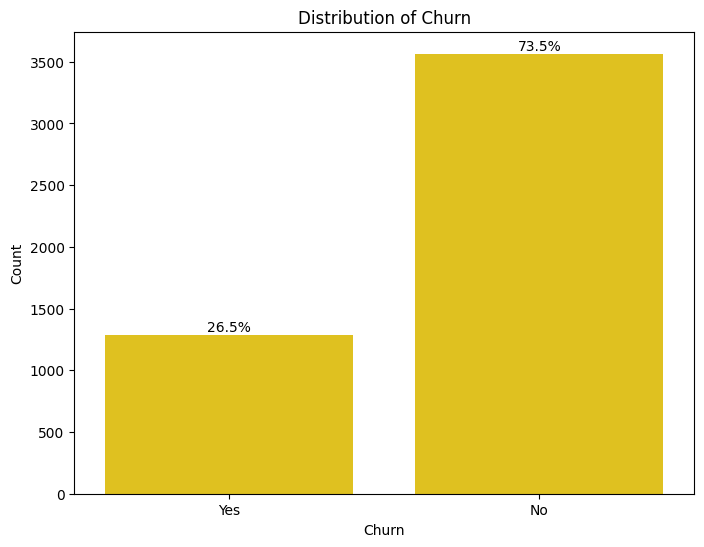

In [20]:
# Fungsi untuk memeriksa distribusi variabel kategorikal
def check_categorical_distribution(column):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df_cleaned, x=column, color='gold')
    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Menambahkan persentase di tiap bar
    total = len(df_cleaned[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.show()

# Memilih kolom kategorikal
categorical_columns = ['OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'Churn']

# Loop melalui kolom kategorikal dan melakukan analisis distribusi
for column in categorical_columns:
    check_categorical_distribution(column)


># Cek Bivariat Numerik

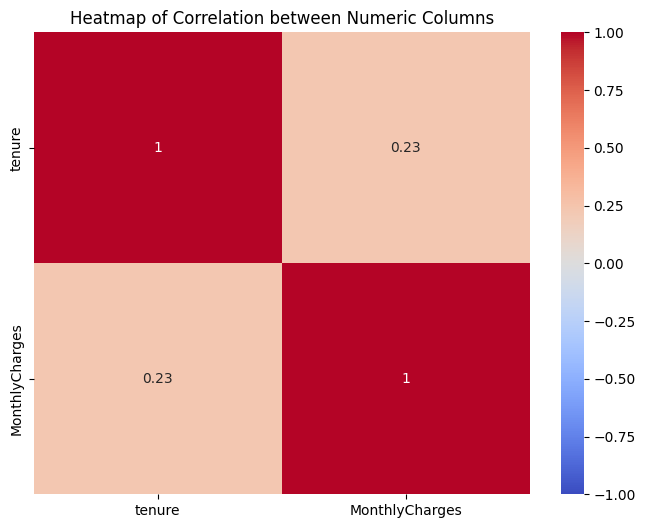

In [21]:
# Memilih kolom numerik
numeric_columns = [ 'tenure', 'MonthlyCharges']

# Menghitung matriks korelasi
correlation_matrix = df_cleaned[numeric_columns].corr()

# Plot heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation between Numeric Columns')
plt.show()

># Cek Outliers

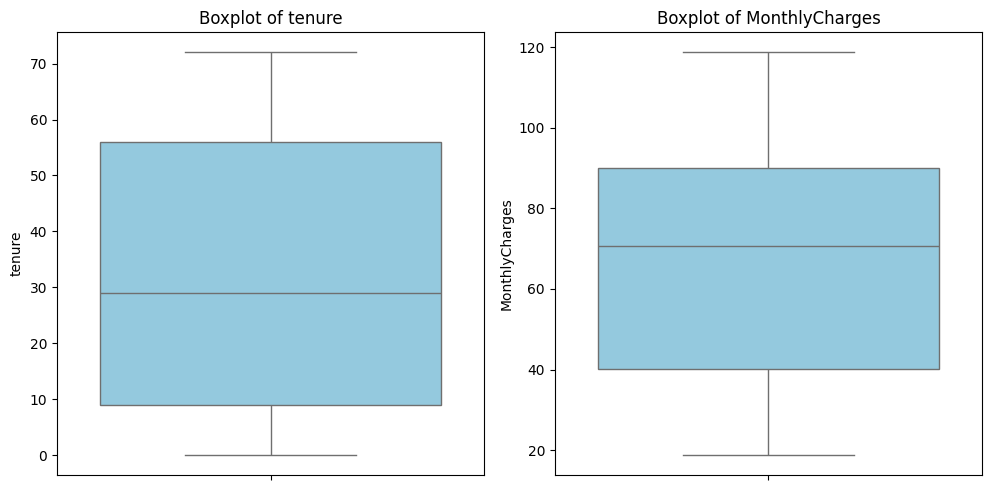

In [22]:
# Memilih kolom numerik
numeric_columns = ['tenure', 'MonthlyCharges']

# Plot boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df_cleaned, y=column, color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


>- Tidak ada outliers dalam kolom numerik

># Pemeriksaan Keseimbangan Label (Churn)

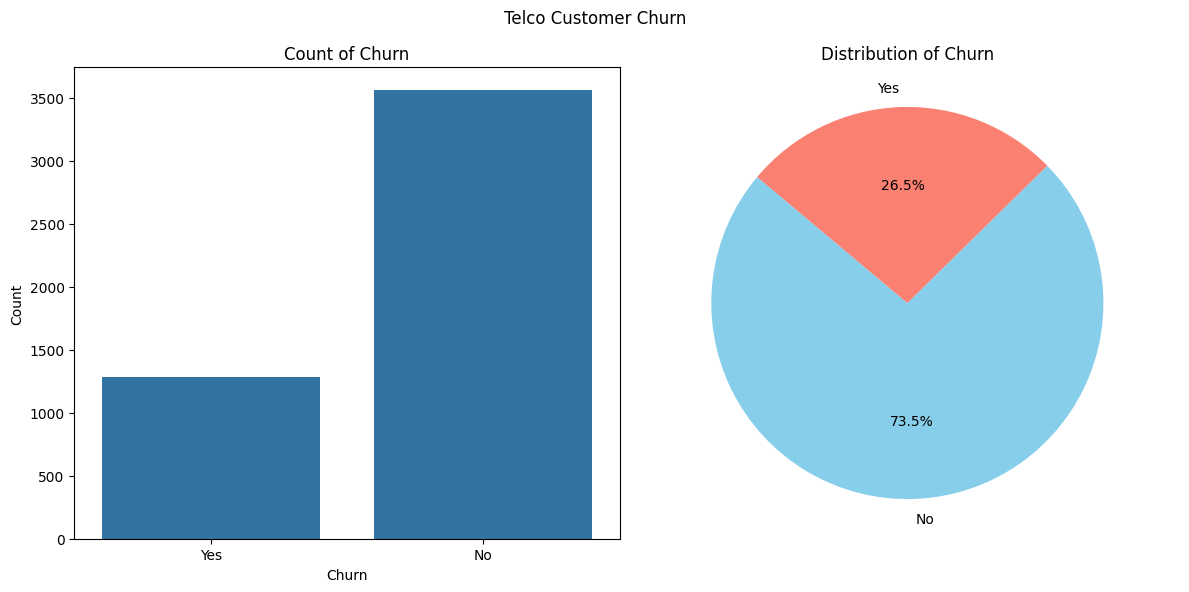

In [23]:
# Plot count untuk variabel target 'Churn'
plt.figure(figsize=(12, 6)).suptitle('Telco Customer Churn')
plt.subplot(1, 2, 1)
sns.countplot(data=df_cleaned, x='Churn')
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Hitung proporsi masing-masing kelas Churn
churn_counts = df_cleaned['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

# Plot pie chart
plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Churn')
plt.axis('equal')
plt.tight_layout()
plt.show()


># Preproseccing Data


- Mengecek Missing value tiap baris 

In [24]:
# Menghitung jumlah missing value tiap baris
missing_values_per_row = df_cleaned.isnull().sum(axis=1)

# Menampilkan hasil
print("Jumlah missing value tiap baris:")
missing_values_per_row

Jumlah missing value tiap baris:


0       0
1       0
2       0
3       0
4       0
       ..
4925    0
4926    0
4927    0
4928    0
4929    0
Length: 4853, dtype: int64

># Mencari nilai yang tidak terlihat seperti "?", "unknown", atau nilai lain

In [25]:
# yang mungkin tidak terdeteksi sebagai nilai yang hilang
hidden_missing_values = df_cleaned.apply(lambda x: x.str.contains(r'^\s*[\?|unknown|other|none|na|NaN]*\s*$').any(), axis=1)

# Menampilkan hasil
print("Baris dengan nilai yang tidak terlihat:")
df_cleaned[hidden_missing_values].head()

# Mencari total jumlah missing value dalam dataframe
total_missing_values = df_cleaned.isnull().sum().sum()

# Jika tidak ada missing value, maka mencetak pesan bahwa tidak ada missing value dalam data
if total_missing_values == 0:
    print("Tidak ada missing value dalam dataframe.")
else:
    print("Ada missing value dalam dataframe.")

Baris dengan nilai yang tidak terlihat:
Tidak ada missing value dalam dataframe.


># Pemeriksaan Anomali

            tenure  MonthlyCharges
count  4853.000000     4853.000000
mean     32.679992       65.321543
std      24.395554       29.783655
min       0.000000       18.800000
25%       9.000000       40.050000
50%      29.000000       70.600000
75%      56.000000       90.050000
max      72.000000      118.650000


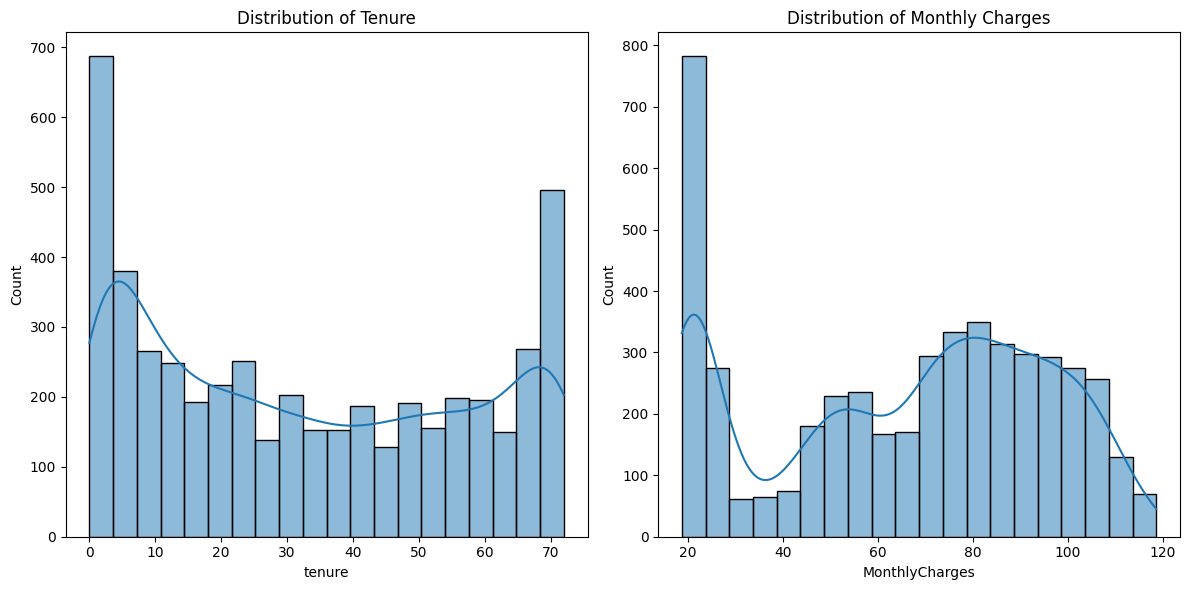

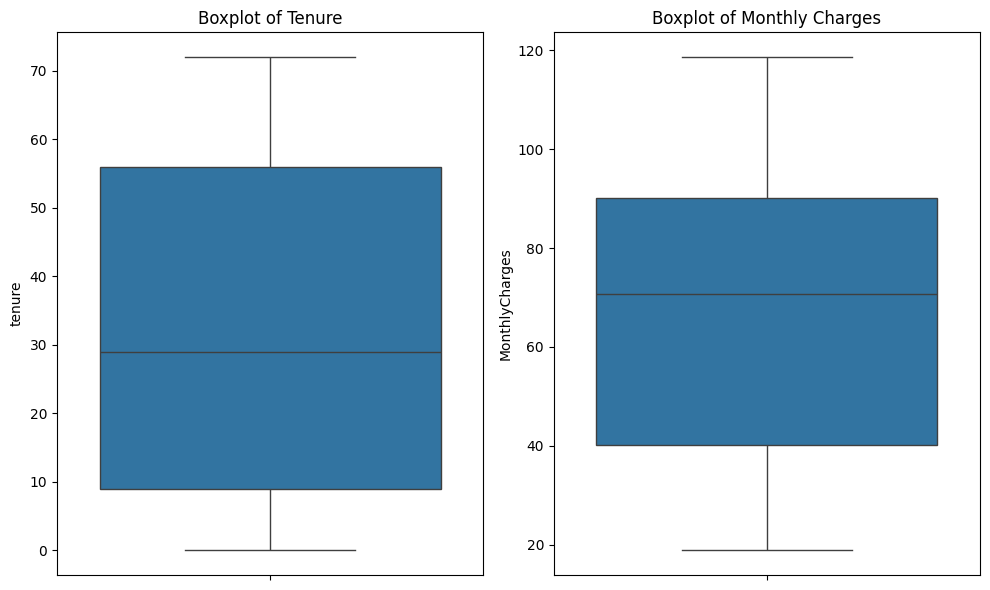

Invalid values in MonthlyCharges: Empty DataFrame
Columns: [Dependents, tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, Churn]
Index: []


In [26]:
# Statistik deskriptif
print(df_cleaned.describe())

# Visualisasi distribusi menggunakan histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['tenure'], bins=20, kde=True)
plt.title('Distribution of Tenure')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['MonthlyCharges'], bins=20, kde=True)
plt.title('Distribution of Monthly Charges')

plt.tight_layout()
plt.show()

# Deteksi outlier menggunakan boxplot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_cleaned['tenure'])
plt.title('Boxplot of Tenure')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')

plt.tight_layout()
plt.show()

# Deteksi nilai tidak valid atau tidak biasa
# Contoh: periksa apakah ada nilai negatif untuk kolom yang seharusnya positif
invalid_values = df_cleaned[df_cleaned['MonthlyCharges'] < 0]
print("Invalid values in MonthlyCharges:", invalid_values)

# Menghitung jumlah layanan yang dimiliki oleh pelanggan


In [27]:
dfInternet = df_cleaned[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']]

# Karena data pada internet service memiliki kategori DSL dan Fiber Optic maka kita ubah data tersebut menjadi Yes yang akan digunakan nanti untuk melihat anomali
def changeValue(x):
    if x != 'No':
        return x
    else:
        return 'Yes'

dfInternet['InternetService'] = dfInternet['InternetService'].apply(changeValue)
dfInternet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,DSL,No,No,Yes,Yes
1,Fiber optic,No,Yes,Yes,No
2,DSL,Yes,No,Yes,Yes
3,DSL,Yes,Yes,Yes,Yes
4,Yes,No,No,No,No
...,...,...,...,...,...
4925,Fiber optic,No,No,Yes,Yes
4926,Fiber optic,No,No,Yes,Yes
4927,Yes,No,No,No,No
4928,Fiber optic,No,No,No,No


In [28]:
def totalInternetService(row):
    total = 0
    colsSkip = ['InternetService']
    for col in row.index:
        if col not in colsSkip and row[col] != 'Yes':
            total += 1
    return total

dfInternet['totalInternetService'] = dfInternet.apply(totalInternetService, axis=1)

dfInternet[(dfInternet['InternetService'] == 'No') & (dfInternet['totalInternetService'] >0)]
dfInternet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,totalInternetService
0,DSL,No,No,Yes,Yes,2
1,Fiber optic,No,Yes,Yes,No,2
2,DSL,Yes,No,Yes,Yes,1
3,DSL,Yes,Yes,Yes,Yes,0
4,Yes,No,No,No,No,4
...,...,...,...,...,...,...
4925,Fiber optic,No,No,Yes,Yes,2
4926,Fiber optic,No,No,Yes,Yes,2
4927,Yes,No,No,No,No,4
4928,Fiber optic,No,No,No,No,4


>#  Analisis Faktor yang Mempengaruhi Churn: 

In [29]:
# Pemisahan fitur dan target
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

# One-hot encoding for remaining categorical variables
X_encoded = pd.get_dummies(X)

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Melatih model regresi logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7909371781668383
              precision    recall  f1-score   support

          No       0.83      0.90      0.86       706
         Yes       0.66      0.49      0.56       265

    accuracy                           0.79       971
   macro avg       0.74      0.70      0.71       971
weighted avg       0.78      0.79      0.78       971



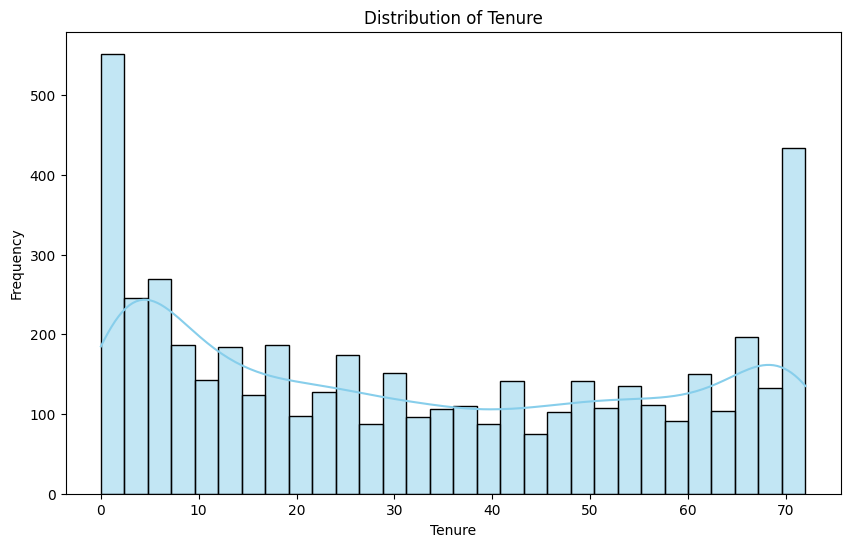

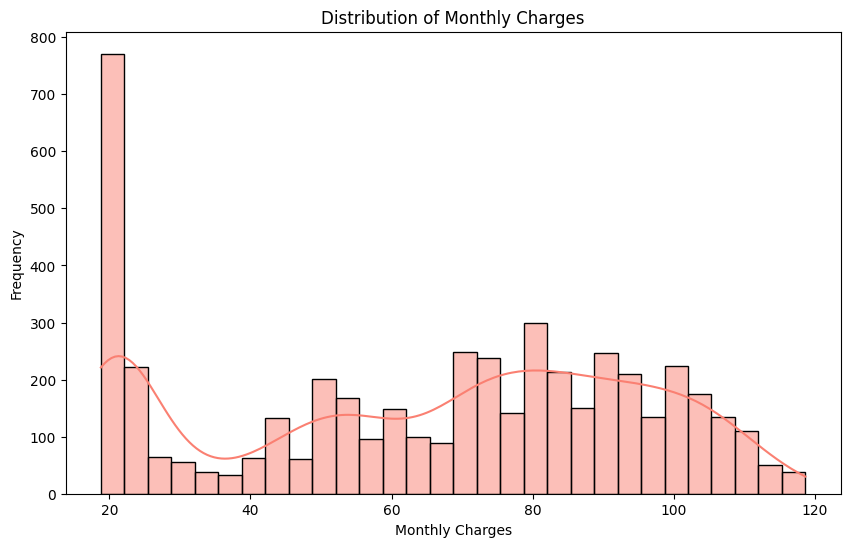

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

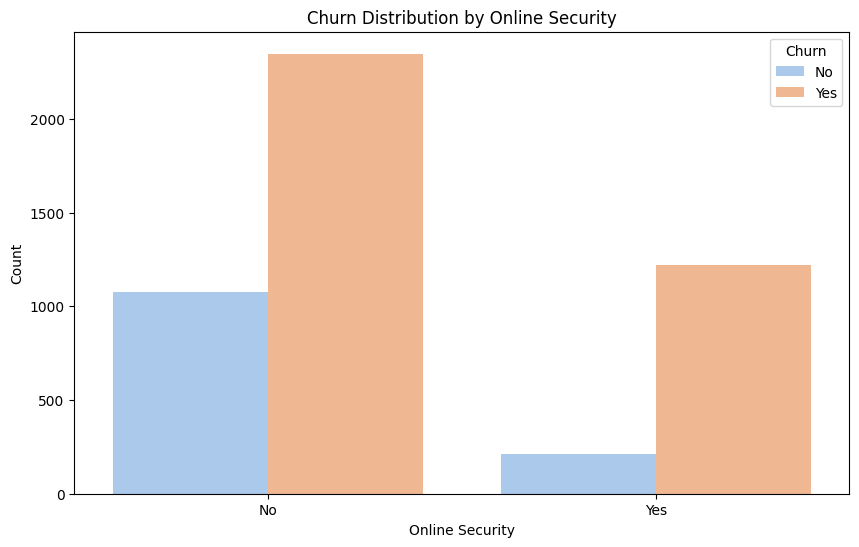

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='OnlineSecurity', hue='Churn', palette='pastel')
plt.title('Churn Distribution by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

># Analisa Data 

In [32]:
df_cleaned['Churn'] = np.where(df_cleaned['Churn'] == 'Yes', 1, 0)

In [73]:
# # Normalisasi fitur numerik
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges']])
X_test[['tenure', 'MonthlyCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges']])

># Cek Multicoliniearity (Spearmen)

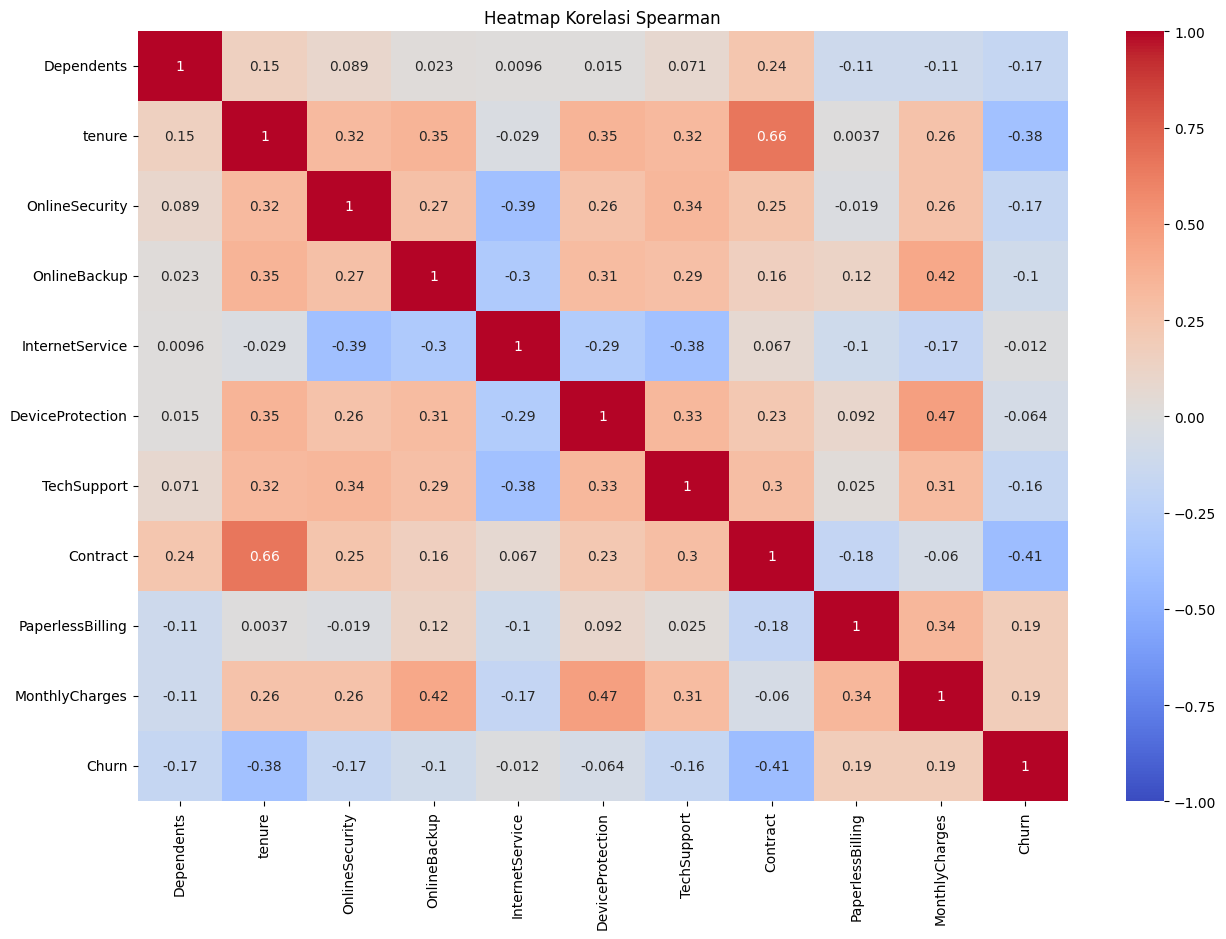

In [34]:
# Salin DataFrame untuk menghindari modifikasi data asli
df_encoded = df_cleaned.copy()

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Ubah nilai kategorikal menjadi numerik
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  # Periksa jika kolom mengandung nilai kategorikal
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Hitung matriks korelasi
correlation_matrix = df_encoded.corr(method='spearman')

# Visualisasi dengan heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Spearman')
plt.show()


In [35]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan model-model yang akan diuji
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()  # Menambahkan XGBoost
}

# Loop untuk melatih dan mengevaluasi model-model
for name, model in models.items():
    try:
        print(f"Training {name}...")
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        # Print evaluation results
        print(f"\n{name} Evaluation:")
        print("Accuracy:", accuracy)
        print("Classification Report:")
        print(report)
        print("="*50)
    except Exception as e:
        print(f"Error training {name}: {e}")

Training Logistic Regression...

Logistic Regression Evaluation:
Accuracy: 0.7909371781668383
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       706
           1       0.65      0.50      0.57       265

    accuracy                           0.79       971
   macro avg       0.74      0.70      0.71       971
weighted avg       0.78      0.79      0.78       971

Training K-Nearest Neighbors...

K-Nearest Neighbors Evaluation:
Accuracy: 0.7600411946446962
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       706
           1       0.57      0.48      0.52       265

    accuracy                           0.76       971
   macro avg       0.69      0.67      0.68       971
weighted avg       0.75      0.76      0.75       971

Training Random Forest...

Random Forest Evaluation:
Accuracy: 0.756951596292482
Classification Report:
        

># Hyperparameter Tuning

In [38]:
from sklearn.metrics import fbeta_score

# Definisikan model-model yang akan diuji
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'F2 Score': []
}

# Loop untuk melatih dan mengevaluasi model-model
for name, model in models.items():
    print(f"Training {name}...")
    # Latih model
    model.fit(X_train, y_train)
    
    # Buat prediksi
    y_pred = model.predict(X_test)
    
    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    
    # Simpan hasil evaluasi
    evaluation_results['Model'].append(name)
    evaluation_results['Accuracy'].append(accuracy)
    evaluation_results['F1 Score'].append(f1)
    evaluation_results['F2 Score'].append(f2)

# Buat DataFrame dari hasil evaluasi
df_results = pd.DataFrame(evaluation_results)
df_results

Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training K-Nearest Neighbors...
Training XGBoost...


,Model,Accuracy,F1 Score,F2 Score
0,Decision Tree,0.722966,0.491493,0.490937
1,Random Forest,0.773429,0.531915,0.494071
2,Gradient Boosting,0.790937,0.565310,0.522979
3,K-Nearest Neighbors,0.760041,0.521561,0.495320
4,XGBoost,0.780639,0.545842,0.506329


>- bisa dilihat disini bahwa XGBoost memiliki performa lebih tinggi daripada model lainnya
kita bisa melakukan analisis pentingnya fitur. Dalam kasus Gradient Boosting, koefisien model dapat digunakan untuk menentukan pentingnya fitur.

In [39]:
# Gabungkan data training dengan label target
df_train = pd.concat([X_train, y_train], axis=1)

# Inisialisasi DataFrame untuk menyimpan hasil statistik deskriptif
descriptive_stats_df = pd.DataFrame()

# Iterasi melalui setiap fitur
for feature in X.columns:
    # Hitung statistik deskriptif berdasarkan fitur dan target 'Churn'
    descriptive_stats = df_train.groupby('Churn')[feature].describe().reset_index()
    # Tambahkan kolom 'Feature' untuk identifikasi fitur
    descriptive_stats['Feature'] = feature
    # Gabungkan hasil statistik deskriptif ke dalam DataFrame utama
    descriptive_stats_df = pd.concat([descriptive_stats_df, descriptive_stats])

# Tampilkan DataFrame
descriptive_stats_df

,Churn,count,mean,std,min,25%,50%,75%,max,Feature
0,0,2859.0,0.353620,0.478177,0.00,0.00,0.00,1.0,1.00,Dependents
1,1,1023.0,0.173998,0.379293,0.00,0.00,0.00,0.0,1.00,Dependents
0,0,2859.0,37.966072,23.920133,0.00,16.00,39.00,61.0,72.00,tenure
1,1,1023.0,17.910068,19.144004,1.00,2.00,10.00,28.0,72.00,tenure
0,0,2859.0,0.341378,0.474255,0.00,0.00,0.00,1.0,1.00,OnlineSecurity
1,1,1023.0,0.167155,0.373297,0.00,0.00,0.00,0.0,1.00,OnlineSecurity
0,0,2859.0,0.378104,0.484999,0.00,0.00,0.00,1.0,1.00,OnlineBackup
1,1,1023.0,0.266862,0.442536,0.00,0.00,0.00,1.0,1.00,OnlineBackup
0,0,2859.0,0.877580,0.798694,0.00,0.00,1.00,2.0,2.00,InternetService
1,1,1023.0,0.826979,0.512443,0.00,1.00,1.00,1.0,2.00,InternetService


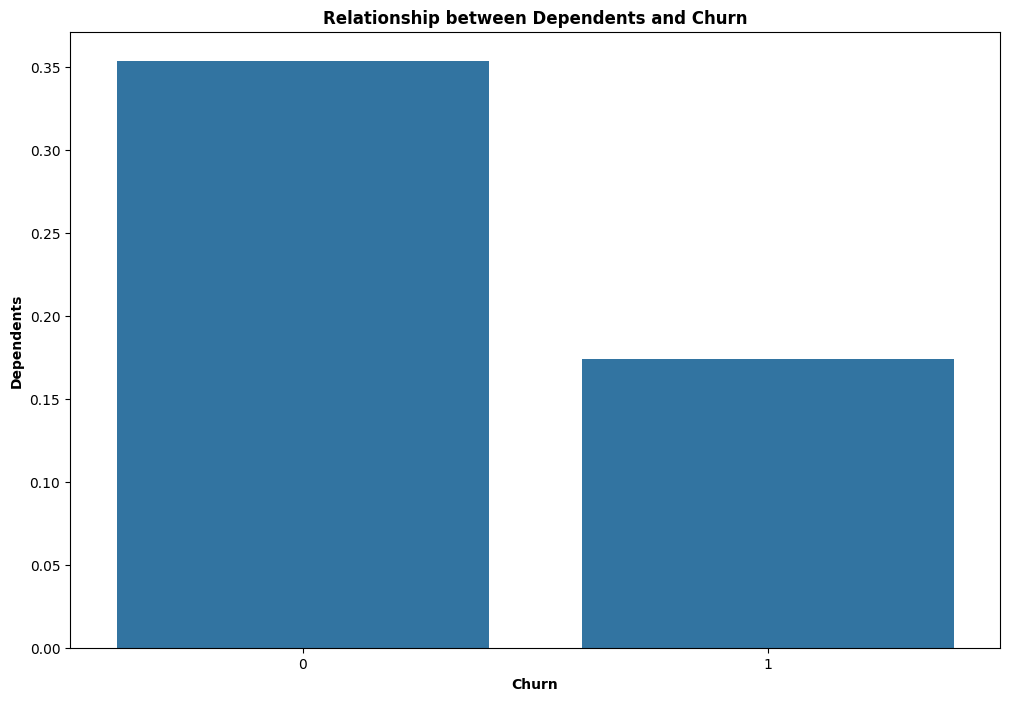

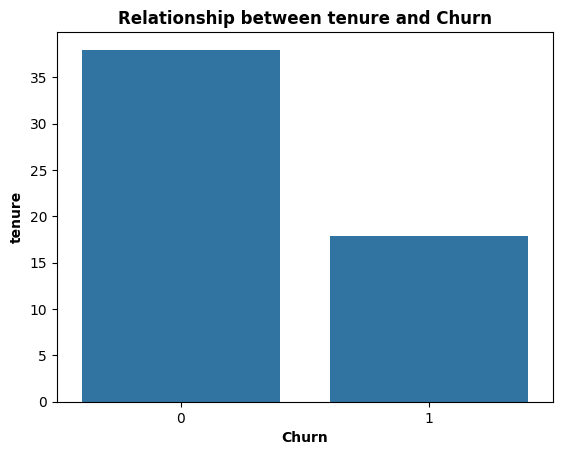

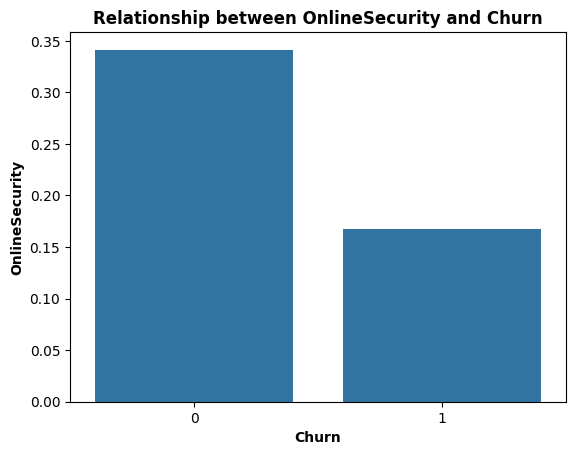

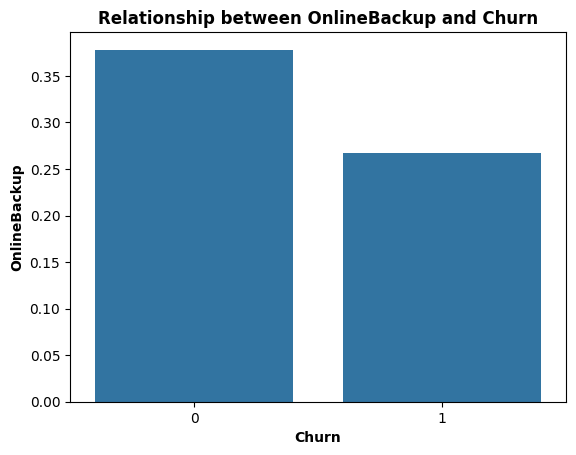

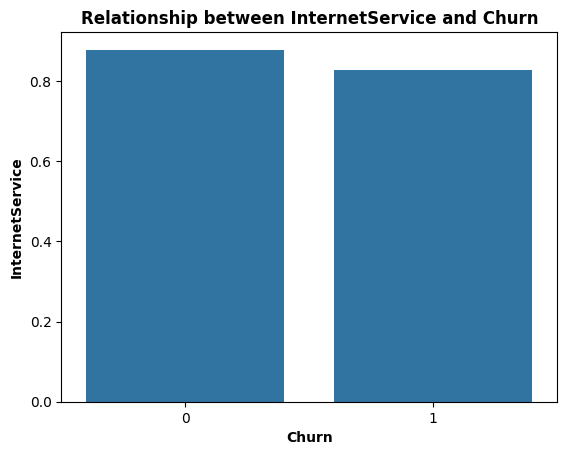

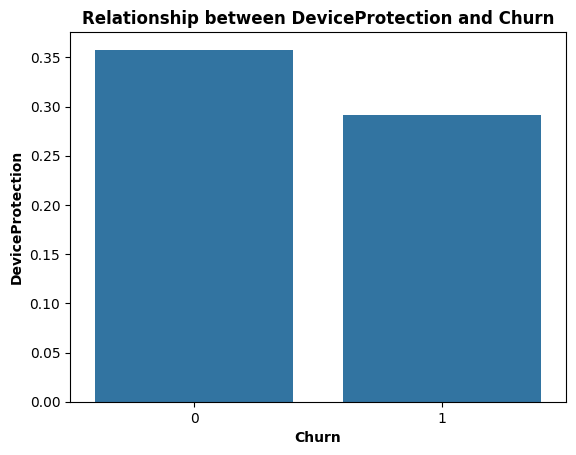

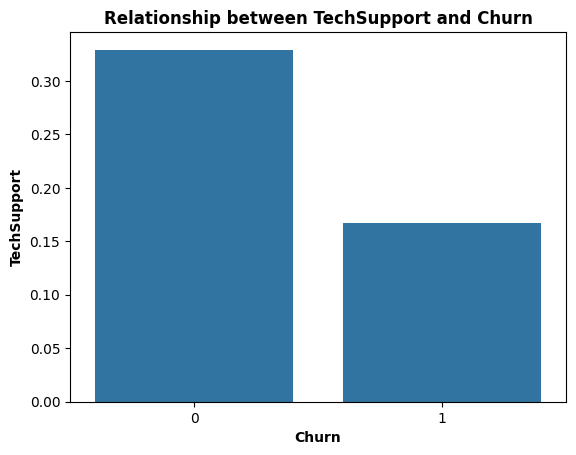

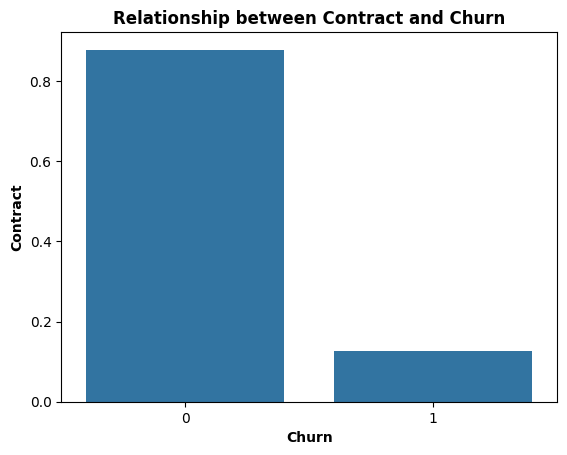

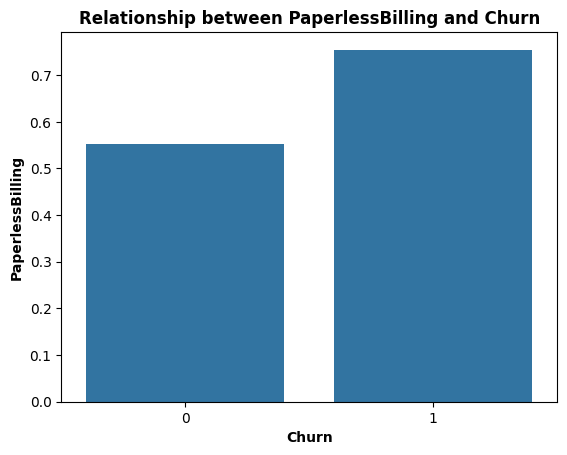

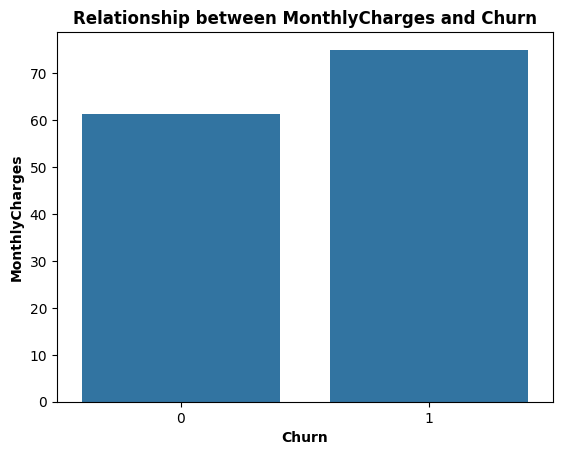

In [40]:
# Plotting hubungan antara setiap fitur dan Churn
plt.figure(figsize=(12, 8))
for feature in X.columns:
    sns.barplot(x='Churn', y=feature, data=pd.concat([X_train, y_train], axis=1), ci=None)
    plt.title(f'Relationship between {feature} and Churn', fontweight='bold')
    plt.xlabel('Churn', fontweight='bold')
    plt.ylabel(feature, fontweight='bold')
    plt.show()

># Machine Learning

In [41]:
# Daftar kolom yang ingin diubah
columns_to_update = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Mengganti nilai 'No internet service' dengan 'No' untuk setiap kolom yang dipilih
for column in columns_to_update:
    df_cleaned[column] = df_cleaned[column].replace({'No internet service': 'No'})

# Cetak nilai unik setelah perubahan
for column in columns_to_update:
    print(f"Unique values in {column}:", df_cleaned[column].unique())

Unique values in OnlineSecurity: ['No' 'Yes']
Unique values in OnlineBackup: ['No' 'Yes']
Unique values in DeviceProtection: ['Yes' 'No']
Unique values in TechSupport: ['Yes' 'No']


In [42]:
# Fungsi untuk menghitung total skor untuk kolom-kolom yang ditentukan
def calculate_custom_score(row):
    score = 0
    
    # Aturan untuk Dependents
    if row['Dependents'] == 'Yes':
        score += 20
    
    # Aturan untuk tenure
    tenure = row['tenure']
    if tenure <= 12:
        score += 10
    elif 13 <= tenure <= 24:
        score += 30
    elif tenure > 24:
        score += 50
    
    # Aturan untuk OnlineSecurity
    if row['OnlineSecurity'] == 'Yes':
        score += 40
    
    # Aturan untuk OnlineBackup
    if row['OnlineBackup'] == 'Yes':
        score += 40
    
    # Aturan untuk InternetService
    if row['InternetService'] == 'Fiber optic':
        score += 60
    elif row['InternetService'] == 'DSL':
        score += 40
    
    # Tambahkan aturan lainnya sesuai kebutuhan
    
    # Aturan untuk Churn
    if row['Churn'] == 'Yes':
        score -= 100
    
    return score

# Menampilkan hasil
df_cleaned.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,0


># Define Feature & Label

In [43]:
# encode seluruh data
# Daftar kolom yang akan diencode
columns_to_encode = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']

# Loop melalui setiap kolom dan mengubah nilai
for column in columns_to_encode:
    df_cleaned[column] = np.where(df_cleaned[column] == 'Yes', 1, 0)

# Menampilkan nilai unik dari setiap kolom untuk memastikan perubahan
for column in columns_to_encode:
    print(f"Unique values in {column}: {df_cleaned[column].unique()}")

Unique values in OnlineSecurity: [0 1]
Unique values in OnlineBackup: [0 1]
Unique values in DeviceProtection: [1 0]
Unique values in TechSupport: [1 0]
Unique values in PaperlessBilling: [1 0]


In [44]:
X=[['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges',]]
y='Churn'

># Split Data 1

In [45]:
X = df_cleaned.drop(['Churn'], axis=1)  # Jika 'Churn' adalah kolom target dan akan dihapus dari fitur-fitur
y = df_cleaned['Churn']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=10)

In [46]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df_train.columns :
    listItem.append( [col, df_train[col].nunique(), df_train[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[0, 1]"
1,tenure,73,"[35, 46, 4, 20, 67, 8, 24, 26, 2, 51, 70, 3, 1, 9, 66, 72, 60, 19, 30, 13, 52, 31, 25, 10, 71, 61, 21, 40, 22, 47, 33, 12, 63, 53, 43, 34, 5, 17, 65, 69, 32, 62, 29, 38, 41, 18, 57, 15, 68, 7, 54, 27, 48, 58, 56, 23, 45, 11, 50, 37, 39, 6, 59, 16, 64, 42, 0, 49, 44, 14, 28, 36, 55]"
2,OnlineSecurity,2,"[1, 0]"
3,OnlineBackup,2,"[1, 0]"
4,InternetService,3,"[1, 0, 2]"
5,DeviceProtection,2,"[1, 0]"
6,TechSupport,2,"[0, 1]"
7,Contract,3,"[1, 0, 2]"
8,PaperlessBilling,2,"[1, 0]"
9,MonthlyCharges,1316,"[108.35, 69.1, 70.2, 79.15, 72.35, 66.7, 24.1, 98.35, 19.25, 84.8, 84.2, 80.7, 20.05, 55.8, 19.3, 94.95, 75.35, 19.5, 103.1, 108.05, 60.25, 39.6, 89.65, 100.2, 56.0, 25.6, 65.25, 49.65, 75.45, 45.0, 34.0, 94.85, 85.9, 69.55, 46.35, 76.0, 114.1, 20.75, 20.6, 81.7, 54.25, 68.95, 93.8, 19.0, 106.6, 43.65, 105.3, 73.0, 19.15, 98.5, 56.9, 69.25, 45.25, 104.3, 19.85, 62.85, 110.75, 79.4, 45.55, 85.05, 85.2, 50.65, 56.5, 19.45, 89.85, 69.0, 85.95, 20.4, 108.8, 54.95, 96.2, 80.5, 86.1, 50.0, 74.95, 79.45, 101.1, 78.2, 104.5, 101.3, 89.55, 66.4, 80.55, 75.8, 91.05, 19.1, 70.7, 19.7, 69.5, 60.2, 85.3, 75.1, 41.1, 82.15, 20.25, 94.1, 30.75, 24.25, 19.8, 25.05, ...]"


># Descriptive Statistic

In [47]:
X_train.select_dtypes(include='object').describe()

,Dependents,InternetService,Contract
count,3397,3397,3397
unique,2,3,3
top,No,Fiber optic,Month-to-month
freq,2356,1506,1868


In [48]:
X_train.describe()

,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000
mean,32.670592,0.293789,0.351487,0.345305,0.288784,0.604357,65.118840
std,24.576246,0.455563,0.477505,0.475538,0.453264,0.489060,29.755322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.800000
25%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.200000
50%,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.750000
75%,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.800000
max,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.650000


>## Normality Test for Numerical

In [49]:
from scipy.stats import normaltest

In [50]:
# Apply normaltest to each column and collect the p-values
normality_results = X_train.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

,Column,p-value
0,tenure,0.0
1,OnlineSecurity,0.0
2,OnlineBackup,0.0
3,DeviceProtection,0.0
4,TechSupport,0.0
5,PaperlessBilling,0.0
6,MonthlyCharges,0.0


In [51]:
normality_results[normality_results['p-value']<=0.05]['Column'].unique()

array(['tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'PaperlessBilling', 'MonthlyCharges'], dtype=object)

> # Melihat Persentase Churn 

In [52]:
df_cleaned.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,0,0,DSL,1,1,Month-to-month,1,72.90,1
1,No,14,0,1,Fiber optic,1,0,Month-to-month,1,82.65,0
2,No,64,1,0,DSL,1,1,Two year,0,47.85,1
3,No,72,1,1,DSL,1,1,Two year,0,69.65,0
4,No,3,0,0,No,0,0,Month-to-month,1,23.60,0


In [53]:
# Memeriksa distribusi kelas dalam dataset churn Telco yang sudah dibersihkan
class_distribution = df_cleaned['Churn'].value_counts()
print("Distribusi Kelas dalam Dataset Utama:")
print(class_distribution)

# Bagi dataset menjadi train dan test set
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memeriksa distribusi kelas dalam data test
test_class_distribution = y_test.value_counts()
print("\nDistribusi Kelas dalam Data Test:")
print(test_class_distribution)

# Misalkan kita memiliki informasi distribusi kelas aktual
# dan ingin membandingkannya dengan distribusi kelas dalam data test
actual_churn_rate = 0.25  # misalnya, 25% pelanggan churn dalam data aktual

# Cetak perbandingan
print(f"\nDistribusi Kelas Aktual: Churn=Yes {actual_churn_rate * 100}%, Churn=No {100 - actual_churn_rate * 100}%")

# Contoh perbandingan dengan nilai aktual
if actual_churn_rate > 0:
    if 'Yes' in test_class_distribution.index and 'No' in test_class_distribution.index:
        test_churn_rate = test_class_distribution['Yes'] / len(y_test)
        actual_non_churn_rate = 1 - actual_churn_rate
        test_non_churn_rate = test_class_distribution['No'] / len(y_test)
        
        print(f"Distribusi Kelas dalam Data Test: Churn=Yes {test_churn_rate * 100}%, Churn=No {test_non_churn_rate * 100}%")
    else:
        print("Label 'Yes' or 'No' not found in test data.")
else:
    print("Nilai actual_churn_rate tidak valid.")

Distribusi Kelas dalam Dataset Utama:
Churn
0    3565
1    1288
Name: count, dtype: int64

Distribusi Kelas dalam Data Test:
Churn
0    706
1    265
Name: count, dtype: int64

Distribusi Kelas Aktual: Churn=Yes 25.0%, Churn=No 75.0%
Label 'Yes' or 'No' not found in test data.


Persentase churn dari data set ini sebanyak 25% orang yang churn dan 75% orang yang tetap stay/ tidak melakukan churn 

> ## Multicolinearity

> Ingin melihat multi korelasi antar fitur 

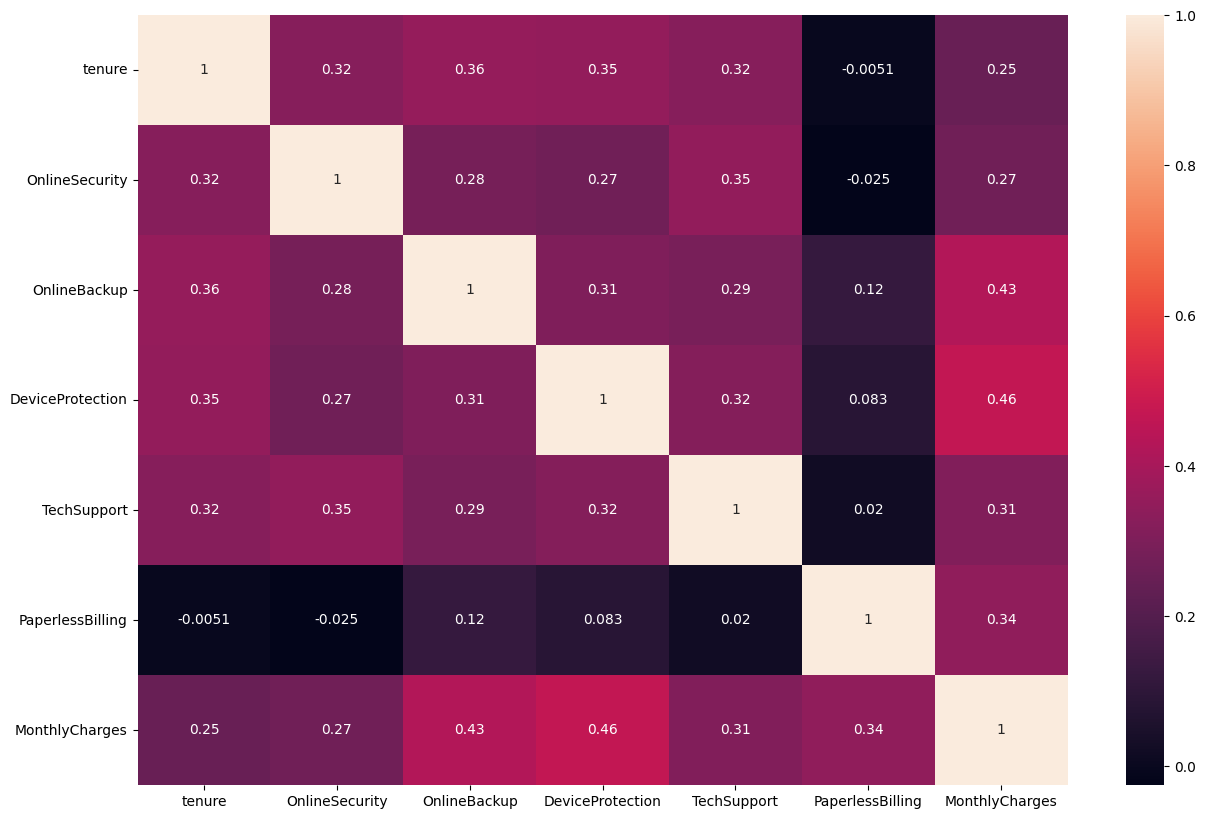

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

In [55]:
dfcorr=X_train.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] >= 0.6 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)
result

[['tenure', 'tenure'],
 ['OnlineSecurity', 'OnlineSecurity'],
 ['OnlineBackup', 'OnlineBackup'],
 ['DeviceProtection', 'DeviceProtection'],
 ['TechSupport', 'TechSupport'],
 ['PaperlessBilling', 'PaperlessBilling'],
 ['MonthlyCharges', 'MonthlyCharges']]

In [56]:
cols=['InternetService','Contract']
for i in cols:
    print(i)
    print(pd.concat([X_train,y_train],axis=1).groupby(i)['Churn'].mean().reset_index().sort_values(by='Churn')[i].unique())
    display(pd.concat([X_train,y_train],axis=1).groupby(i)['Churn'].mean().reset_index().sort_values(by='Churn'))

InternetService
['No' 'DSL' 'Fiber optic']


,InternetService,Churn
2,No,0.074481
0,DSL,0.176820
1,Fiber optic,0.421666


Contract
['Two year' 'One year' 'Month-to-month']


,Contract,Churn
2,Two year,0.028415
1,One year,0.096178
0,Month-to-month,0.426252


># Feature Selection

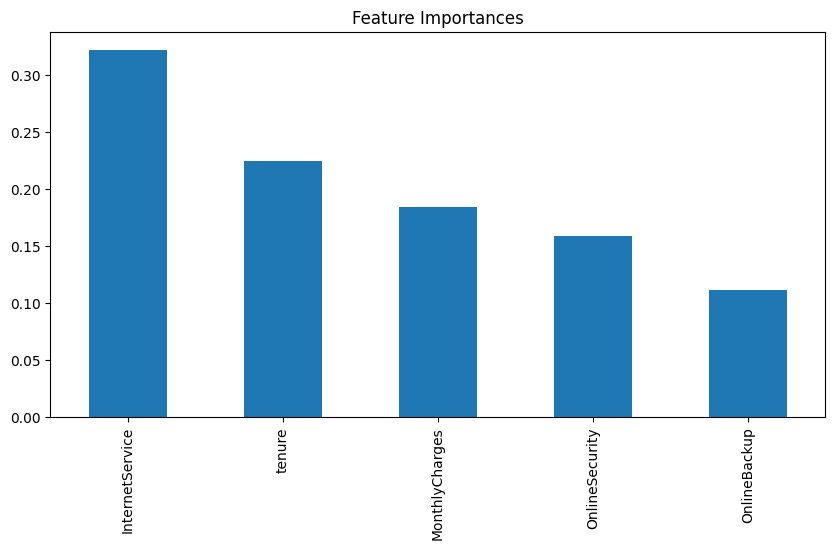

Pentingnya fitur yang dipilih:
InternetService    0.322232
tenure             0.224909
MonthlyCharges     0.183784
OnlineSecurity     0.158259
OnlineBackup       0.110816
dtype: float32


In [78]:
# Define the desired features
desired_features = ['InternetService', 'MonthlyCharges', 'OnlineBackup', 'tenure', 'OnlineSecurity']
#Pisahkan fitur yang diinginkan dari dataset
df_train_feat = df_train[desired_features].copy()

# Definisikan fitur kategorikal yang ada dalam fitur yang diinginkan
cat_features = [feature for feature in desired_features if df_train[feature].dtype == 'object']

# Isi nilai yang hilang pada fitur kategorikal dengan 'missing'
df_train_feat[cat_features] = df_train_feat[cat_features].fillna(value='missing')

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Transformasi fitur kategorikal menjadi angka
df_train_feat[cat_features] = df_train_feat[cat_features].astype('string').apply(le.fit_transform)

# Inisialisasi dan latih model XGBRegressor
xgb = XGBRegressor()
xgb.fit(df_train_feat, df_train['Churn'])

# Ekstraksi pentingnya fitur
xgb_coef1 = pd.Series(xgb.feature_importances_, df_train_feat.columns).sort_values(ascending=False)

# Plot pentingnya fitur
plt.figure(figsize=(10, 5))
xgb_coef1.plot(kind='bar', title='Feature Importances')
plt.show()

# Melihat fitur yang paling penting
print("Pentingnya fitur yang dipilih:")
print(xgb_coef1)


>## Final Feature

Fitur yang akan dipakai 

In [57]:
# Check the columns in X_train and X_test
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

# Define the desired features
desired_features = ['InternetService', 'MonthlyCharges', 'OnlineBackup', 'tenure', 'OnlineSecurity']

# Check for missing features
missing_features_train = [feature for feature in desired_features if feature not in X_train.columns]
missing_features_test = [feature for feature in desired_features if feature not in X_test.columns]

# Print missing features
if missing_features_train:
    print(f"Missing features in X_train: {missing_features_train}")
if missing_features_test:
    print(f"Missing features in X_test: {missing_features_test}")

# If there are missing features, you can add them with default values (e.g., NaN or a specific value)
for feature in missing_features_train:
    X_train[feature] = np.nan  # or a specific default value

for feature in missing_features_test:
    X_test[feature] = np.nan  # or a specific default value

# Now select the desired features
X_train = X_train[desired_features]
X_test = X_test[desired_features]

Columns in X_train: Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges'],
      dtype='object')
Columns in X_test: Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges'],
      dtype='object')


In [58]:
fitur=['InternetService', 'MonthlyCharges',
       'OnlineBackup', 'tenure', 'OnlineSecurity']

X_train=X_train[fitur]
X_test=X_test[fitur]

># Model Benchmark

In [64]:
# Define models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# Define imbalance treatment methods
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()

# A dictionary containing models used
models = {
    'KNN': knn,
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Gradient Boosting': gboost,
}

# A dictionary containing resampling method used
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# A dictionary containing metrics used
metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# Iterate over all models, resampling, and cross-validate method
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = ImbPipeline([
                ('preprocessor', preprocessor),
                ('model', model),
            ])
        else:
            estimator = ImbPipeline([
                ('preprocessor', preprocessor),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr
})

model_bench

,model,resample,accuracy,precision,recall,F1
0,KNN,none,67.019133,57.006657,46.629842,51.295211
1,Logistic Regression,none,68.173022,63.762337,45.649928,53.190961
2,Decision Tree,none,62.609569,45.224740,44.666188,44.868349
3,XGBoost,none,68.167894,58.712957,48.577714,53.131850
4,Random Forest,none,65.524683,53.877635,44.864658,48.906030
5,Gradient Boosting,none,68.934157,64.261249,47.311813,54.477225
6,KNN,ros,68.359372,44.810219,65.784792,53.290617
7,Logistic Regression,ros,74.461532,50.202993,75.855571,60.406355
8,Decision Tree,ros,63.767086,46.436063,47.016738,46.659720
9,XGBoost,ros,71.354260,51.328454,64.708752,57.231613


- Gradient Boosting cenderung memberikan recall yang lebih tinggi (sekitar 76% - 78%) daripada model lainnya di semua metode resampling.
- Logistic Regression memiliki precision yang sedikit lebih baik (sekitar 50% - 51%) dibandingkan dengan model lainnya di beberapa metode resampling.
- Metode Resampling: smote dan rus cenderung memberikan hasil yang lebih baik secara konsisten dalam recall dan F1 score dibandingkan dengan ros atau tidak ada resampling.

># Perbandingan Model 

In [66]:
# Group by model and find the row with the highest recall for each group
top_recall_per_model = model_bench.loc[model_bench.groupby('model')['recall'].idxmax()]

# Sort the results by recall in descending order
top_recall_per_model = top_recall_per_model.sort_values(by='recall', ascending=False)

# Display the results
top_recall_per_model

,model,resample,accuracy,precision,recall,F1
17,Gradient Boosting,rus,75.140925,49.761257,78.787661,60.988535
7,Logistic Regression,ros,74.461532,50.202993,75.855571,60.406355
15,XGBoost,rus,71.797514,46.272102,74.584888,57.110621
12,KNN,rus,71.844689,47.029825,73.314682,57.282227
16,Random Forest,rus,69.345951,45.142764,68.422286,54.362721
14,Decision Tree,rus,65.260142,40.018388,65.881875,49.784191


- Gradient Boosting dan Logistic Regression adalah dua model terbaik berdasarkan keseluruhan performa (berdasarkan rata-rata F1 score dan recall).
- XGBoost dan KNN juga memberikan performa yang solid, terutama dalam hal recall.
- Random Forest dan Decision Tree memiliki performa yang lebih rendah dibandingkan dengan model lainnya dalam hal recall dan F1 score.

># Pipeline

> Dalam konteks machine learning, penggunaan pipeline sangat berguna untuk mengatur alur pemrosesan data dan model. Penggunaan pipeline memungkinkan kita untuk menggabungkan beberapa langkah pemrosesan data (seperti normalisasi, pengkodean kategori, atau ekstraksi fitur) dan model ke dalam satu entitas yang dapat dijalankan secara bersamaan.

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical 1', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), [ 'MonthlyCharges', 'tenure']),

        ('Categorical 1', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OrdinalEncoder())
        ]), ['InternetService', 'OnlineBackup', 'OnlineSecurity'])
]
)

# Definisikan pipeline tanpa classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('resampling', SMOTE()),  # Oversampling dengan SMOTE
    ('classifier', RandomForestClassifier())  # Placeholder untuk classifier
])

param_grid = [
    {
        'feature_selection__k': [10,20],  # Ubah nilai k dari 1 hingga 20
        'classifier': [MLPClassifier()],
        'classifier__learning_rate': ['constant'],
        'classifier__learning_rate_init': [0.01, 0.1],
        'classifier__alpha': [0.0001,1, 10],
        'classifier__solver': ['lbfgs', 'adam']
    },
    
        {
        'feature_selection__k': [10,20],  # Ubah nilai k dari 1 hingga 20
        'classifier': [CatBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
        {
        'feature_selection__k': [10,20],  # Ubah nilai k dari 1 hingga 20
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1,  4]
    },
    {
        'feature_selection__k': [10,20],  # Ubah nilai k dari 1 hingga 20
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1,  4]
    },
    {
        'feature_selection__k': [10,20],  # Ubah nilai k dari 1 hingga 20
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    {
        'feature_selection__k': [10,20],  # Ubah nilai k dari 1 hingga 20
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__subsample': [0.6, 0.8]
    },
    {
        'feature_selection__k': [10,20],  # Ubah nilai k dari 1 hingga 20
        'classifier': [svm.SVC()],
        'classifier__kernel': ['linear', 'poly'],
        'classifier__C': [1,5]
    }
]

# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')

# Measure the fitting time
start_time = time.time()


# Fit GridSearchCV ke data
gscv.fit(X_train, y_train)

end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 128.44 seconds


># Predict Ke Data Test

In [69]:
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical 1', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), ['MonthlyCharges', 'tenure']),
        
        ('Categorical 1', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OrdinalEncoder())
        ]), ['InternetService', 'OnlineBackup', 'OnlineSecurity'])
    ]
)

# Define chosen model
logreg = LogisticRegression(random_state=42)

# Define resampling methods
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

# List of models
models = [
    ('Logistic Regression', logreg),
]

# List of resampling methods
resamples = [
    ('RandomOverSampling', ros),
    ('RandomUnderSampling', rus),
    ('SMOTE', smote)
]

# List to store results
metrics = []

# Iterate over both models and resampling methods
for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = ImbPipeline([
            ('preprocessor', preprocessor),
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            f'{name_model} with {name_resample}',
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            recall_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Display the results
metrics_df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression with RandomOverSampling,71.575695,48.607595,72.452830,58.181818
1,Logistic Regression with RandomUnderSampling,71.575695,48.586118,71.320755,57.798165
2,Logistic Regression with SMOTE,71.884655,48.963731,71.320755,58.064516


- Dalam kasus ini, untuk model Logistic Regression, baik RandomOverSampling maupun SMOTE menunjukkan performa yang sedikit lebih baik dalam hal recall dan F1 score dibandingkan dengan RandomUnderSampling.
- Meskipun demikian, tidak ada perbedaan besar dalam akurasi dan precision antara ketiga metode resampling ini.
- Pemilihan metode resampling dapat disesuaikan dengan tujuan aplikatif khusus, seperti menekankan recall untuk mengidentifikasi sebanyak mungkin kasus positif (menghindari false negative) atau mempertimbangkan keseimbangan antara precision dan recall tergantung pada konteks bisnis atau ilmiah yang lebih luas.

># Logistic Regression Works

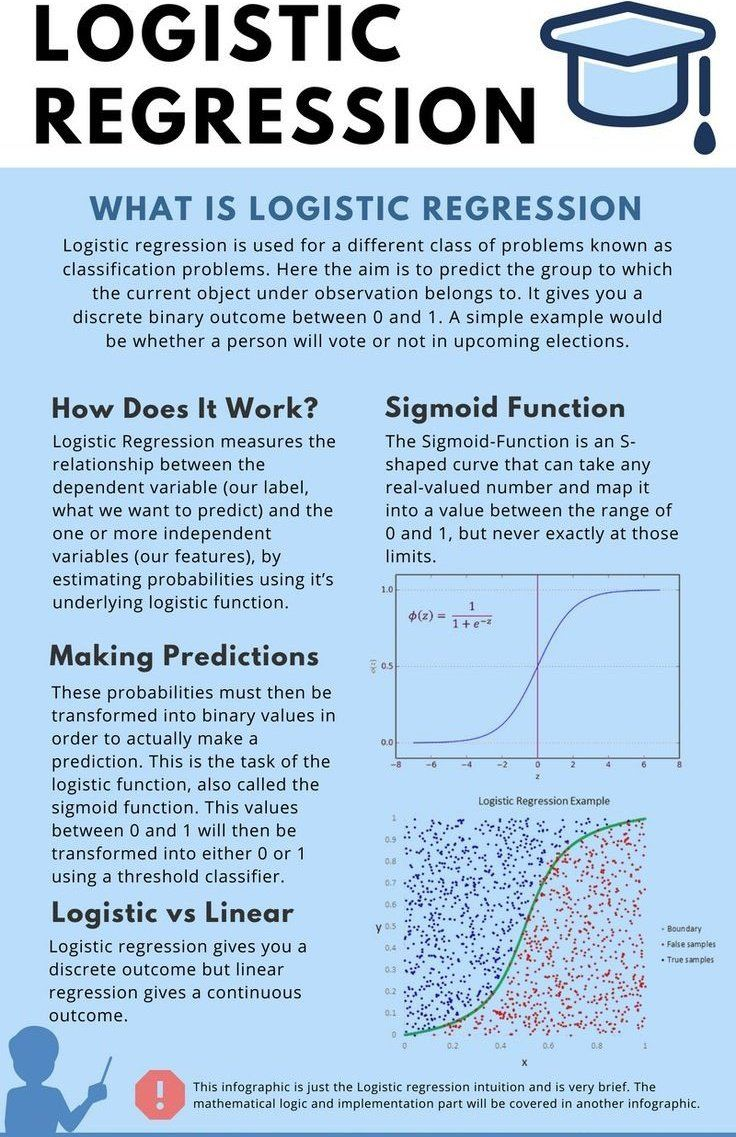

In [ ]:
# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')

# Measure the fitting time
start_time = time.time()


# Fit GridSearchCV ke data
gscv.fit(X_train, y_train)


end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 70.68 seconds


In [ ]:
gscv.feature_names_in_

array(['InternetService', 'MonthlyCharges', 'OnlineBackup', 'tenure',
       'OnlineSecurity'], dtype=object)

In [ ]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical 1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['MonthlyCharges', 'tenure']),
                                                 ('Categorical 1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['InternetService',
                                                   'OnlineBackup',
                                                   'OnlineSecurity'])])),
                ('feature_selection', SelectKBest(k=20)),
                ('resampling', SMOTE()),
                ('classifier',
                 MLPClassifier(alpha=10, learning_rate_init=0.01,
                               solver='lbfgs'))])

In [ ]:
pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__alpha,param_classifier__learning_rate,param_classifier__learning_rate_init,param_classifier__solver,param_feature_selection__k,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__C,param_classifier__subsample,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.329574,0.054260,0.011241,0.001907,MLPClassifier(),0.0001,constant,0.01,lbfgs,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': MLPClassifier(), 'classifier__alpha': 0.0001, 'classifier__learning_rate': 'constant', 'classifier__learning_rate_init': 0.01, 'classifier__solver': 'lbfgs', 'feature_selection__k': 10}",0.560150,0.574109,0.583643,0.605578,0.604207,0.585537,0.017486,85
1,4.377514,0.041151,0.012553,0.002852,MLPClassifier(),0.0001,constant,0.01,lbfgs,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': MLPClassifier(), 'classifier__alpha': 0.0001, 'classifier__learning_rate': 'constant', 'classifier__learning_rate_init': 0.01, 'classifier__solver': 'lbfgs', 'feature_selection__k': 20}",0.555970,0.569343,0.602230,0.605108,0.606526,0.587836,0.021035,79
2,2.454677,0.838690,0.014294,0.003011,MLPClassifier(),0.0001,constant,0.01,adam,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': MLPClassifier(), 'classifier__alpha': 0.0001, 'classifier__learning_rate': 'constant', 'classifier__learning_rate_init': 0.01, 'classifier__solver': 'adam', 'feature_selection__k': 10}",0.557895,0.584104,0.591150,0.619883,0.627767,0.596160,0.025284,60
3,1.997557,0.385864,0.015597,0.004248,MLPClassifier(),0.0001,constant,0.01,adam,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': MLPClassifier(), 'classifier__alpha': 0.0001, 'classifier__learning_rate': 'constant', 'classifier__learning_rate_init': 0.01, 'classifier__solver': 'adam', 'feature_selection__k': 20}",0.572597,0.592308,0.591912,0.607966,0.628571,0.598671,0.018689,54
4,3.915077,0.218392,0.015090,0.004712,MLPClassifier(),0.0001,constant,0.1,lbfgs,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': MLPClassifier(), 'classifier__alpha': 0.0001, 'classifier__learning_rate': 'constant', 'classifier__learning_rate_init': 0.1, 'classifier__solver': 'lbfgs', 'feature_selection__k': 10}",0.549451,0.570384,0.599628,0.603175,0.611722,0.586872,0.023316,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.540992,0.030836,0.045459,0.003153,SVC(),NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,1,NaN,poly,"{'classifier': SVC(), 'classifier__C': 1, 'classifier__kernel': 'poly', 'feature_selection__k': 20}",0.565836,0.590826,0.578097,0.583486,0.624535,0.588556,0.019753,76
234,0.640729,0.013082,0.045383,0.002948,SVC(),NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,5,NaN,linear,"{'classifier': SVC(), 'classifier__C': 5, 'classifier__kernel': 'linear', 'feature_selection__k': 10}",0.577438,0.582231,0.601113,0.602362,0.626923,0.598013,0.017531,56
235,0.629765,0.025132,0.046066,0.004074,SVC(),NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,5,NaN,linear,"{'classifier': SVC(), 'classifier__C': 5, 'classifier__kernel': 'linear', 'feature_selection__k': 20}",0.589147,0.581006,0.602996,0.610236,0.626642,0.602005,0.016012,41
236,0.673601,0.050977,0.035179,0.004313,SVC(),NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,5,NaN,poly,"{'classifier': SVC(), 'classifier__C': 5, 'classifier__kernel': 'poly', 'feature_selection__k': 10}",0.571949,0.594393,0.587591,0.582878,0.630798,0.593522,0.020021,67


In [ ]:
y_pred=gscv.best_estimator_.predict(X_test)

In [ ]:
print('recall',recall_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred))
print('f1 score',f1_score(y_test, y_pred))

recall 0.7283018867924528
precision 0.5273224043715847
f1 score 0.6117274167987322


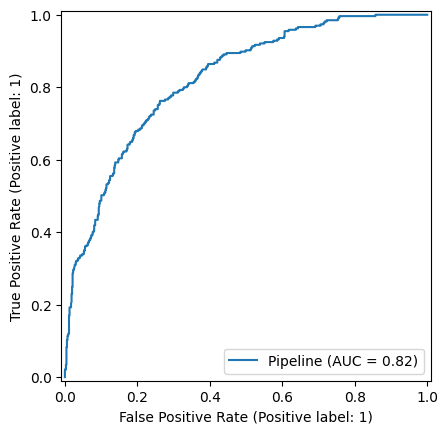

In [ ]:
RocCurveDisplay.from_estimator(gscv.best_estimator_,X_test, y_test)

In [ ]:
model=gscv.best_estimator_
model.fit(X_train,y_train)

th_value=[i/100 for i in range(1,99)]
score=0
score_list=[]

for i in th_value:
    y_prob=model.predict_proba(X_test)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=f1_score(y_test,y_pred)
    score_list.append(score_temp)

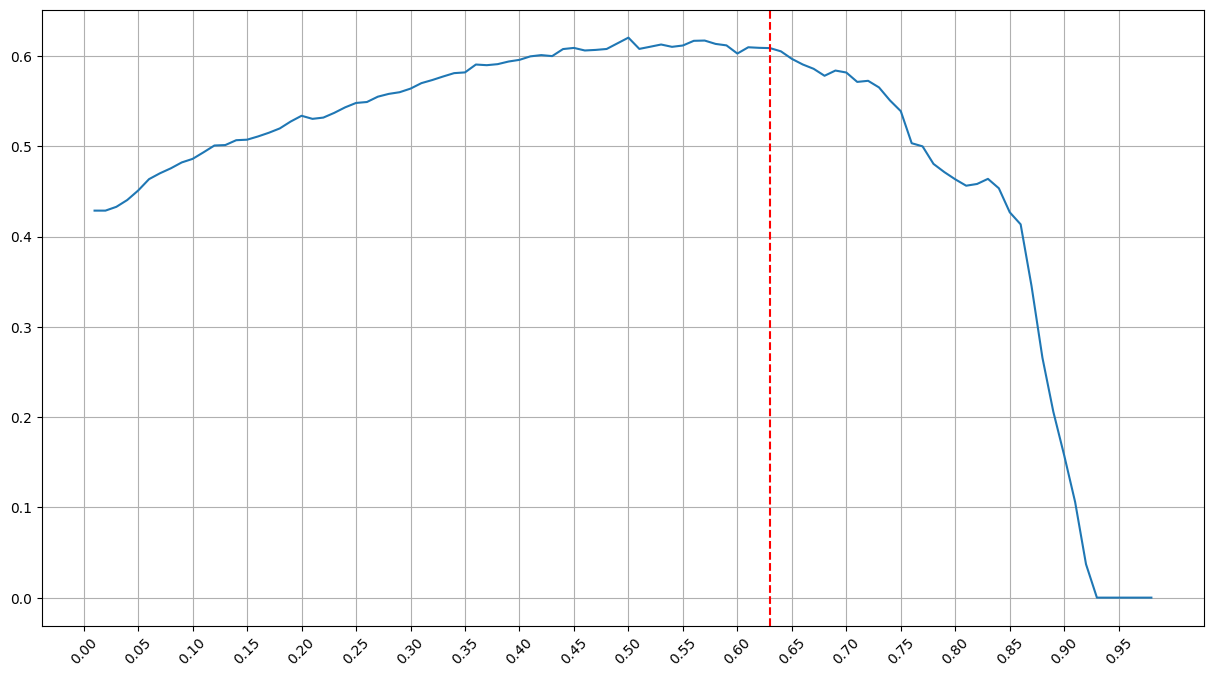

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value,y=score_list)
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.axvline(x=0.63, linestyle='--',color='red')
plt.grid()
plt.show()

># Change Threshold

Mengganti threshold saja

In [ ]:
y_prob=gscv.best_estimator_.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>0.59,1,0)

In [ ]:
print('recall',recall_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred))
print('f1 score',f1_score(y_test, y_pred))

recall 0.660377358490566
precision 0.5700325732899023
f1 score 0.6118881118881119


># Limitasi Model 

> Limitasi model merujuk pada batasan-batasan atau kelemahan yang dimiliki oleh suatu model dalam melakukan prediksi atau pemodelan data. Pemahaman terhadap limitasi model penting karena membantu kita dalam mengenali situasi di mana model mungkin tidak bekerja dengan baik atau memberikan hasil yang akurat.

In [ ]:
#false negatif dari model machine learning
y_test2=pd.DataFrame(y_test)
y_test2.reset_index(drop=True,inplace=True)
y_pred=pd.DataFrame(y_pred)
df_final=pd.concat([y_test2,y_pred],axis=1)
len(df_final[(df_final['Churn']==1)&(df_final[0]==0)])

66

In [62]:
# Cetak kolom dari X_train untuk debugging
print("Kolom dari X_train:", X_train.columns)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical 1', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), ['MonthlyCharges', 'tenure']),
        
        ('Categorical 1', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OrdinalEncoder())
        ]), ['InternetService', 'OnlineBackup', 'OnlineSecurity'])
    ]
)

# Define pipeline without classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('resampling', SMOTE()),  # Oversampling with SMOTE
    ('classifier', RandomForestClassifier())  # Placeholder for classifier
])

# Parameter grid for GridSearchCV or RandomizedSearchCV
param_grid = [
    {
        'feature_selection__k': [10, 20],  # Change k values from 10 to 20
        'classifier': [MLPClassifier()],
        'classifier__learning_rate': ['constant'],
        'classifier__learning_rate_init': [0.01, 0.1],
        'classifier__alpha': [0.0001, 1, 10],
        'classifier__solver': ['lbfgs', 'adam']
    },
    {
        'feature_selection__k': [10, 20],  # Change k values from 10 to 20
        'classifier': [CatBoostClassifier(verbose=0)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__learning_rate': [0.01, 0.1]
    }
]

# GridSearchCV or RandomizedSearchCV instance
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)
print("Best F1 score found: {:.4f}".format(grid_search.best_score_))

Kolom dari X_train: Index(['InternetService', 'MonthlyCharges', 'OnlineBackup', 'tenure',
       'OnlineSecurity'],
      dtype='object')
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters found:
{'classifier': <catboost.core.CatBoostClassifier object at 0x0000015C26120850>, 'classifier__learning_rate': 0.01, 'classifier__max_depth': None, 'classifier__n_estimators': 200, 'feature_selection__k': 20}
Best F1 score found: 0.6173


- Model dapat memprediksi dengan benar untuk sekitar 72% dari semua kasus.
- Precision (0.88) lebih tinggi daripada recall (0.71), menunjukkan bahwa dari semua prediksi non-churn, sebagian besar benar, tetapi masih ada non-churn yang salah diklasifikasikan sebagai churn.
- Recall (0.75) lebih tinggi daripada precision (0.49), menunjukkan bahwa model cenderung lebih baik dalam mengidentifikasi kasus churn yang sebenarnya, meskipun dengan tingkat false positive yang cukup tinggi.
- Model ini cenderung lebih baik dalam mengidentifikasi churn (kelas 1) daripada dalam mengidentifikasi non-churn (kelas 0).

> Berdasarkan hasil tuning parameter, model terbaik yang dipilih untuk masalah ini adalah CatBoostClassifier dengan pengaturan parameter optimal: learning_rate 0.01, max_depth None, dan n_estimators 200, serta menggunakan 20 fitur terbaik berdasarkan evaluasi dengan F1 score mencapai 0.6173. Model ini menunjukkan kinerja yang baik dalam mengkombinasikan precision dan recall, yang penting untuk aplikasi klasifikasi dengan fokus pada keseimbangan antara kedua metrik tersebut.

# Feature Important

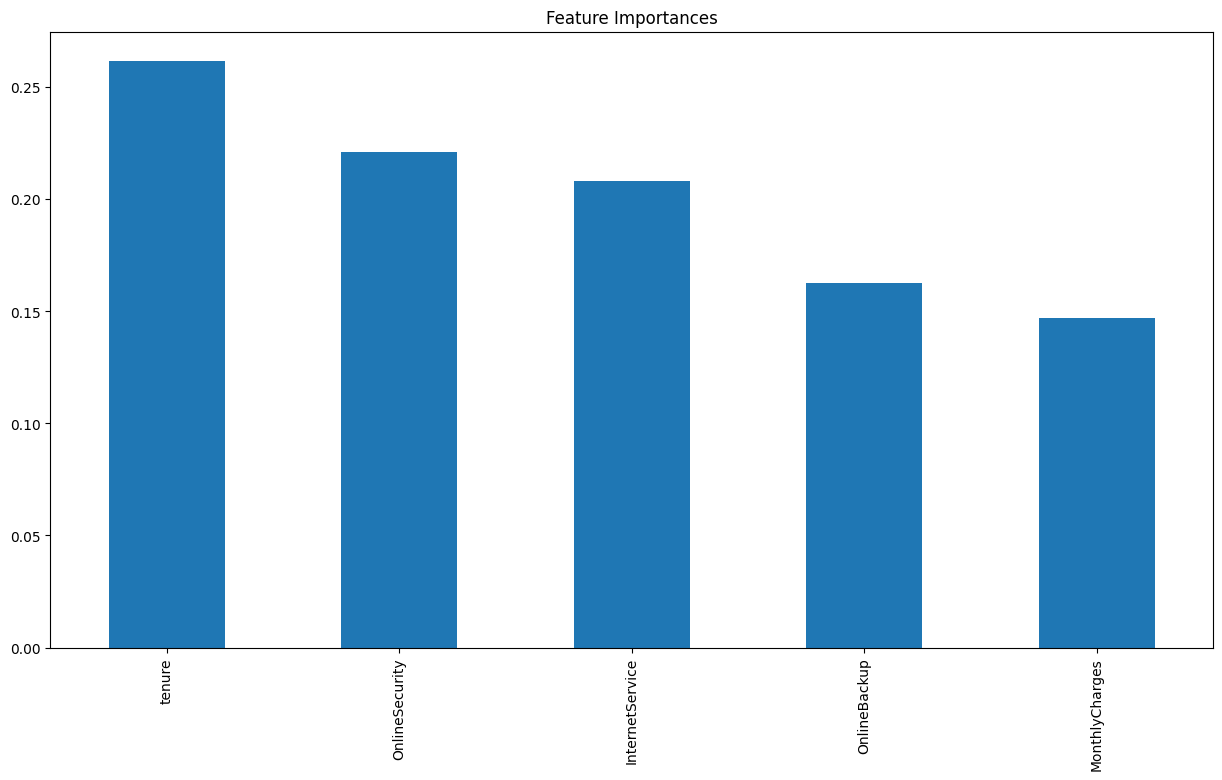

In [ ]:
X_test_feat=X_test.copy()
categorical = X_test_feat.select_dtypes(include = "object").columns
X_test_feat[categorical] = X_test_feat[categorical].fillna(value='missing')
le = LabelEncoder()
X_test_feat[categorical] = X_test_feat[categorical].astype('string').apply(le.fit_transform)

xgb=XGBClassifier()
xgb.fit(X_test_feat,y_test)
xgb_coef1 = pd.Series(xgb.feature_importances_, X_test_feat.columns).sort_values(ascending = False)
plt.figure(figsize=(15,8))
xgb_coef1.iloc[:50].plot(kind='bar', title='Feature Importances')
plt.show()

> Disini feature contract sangat berpengaruh ya ternyata terhadap label (Churn) karena presentase yang lebih tinggi daripada feature lainnya, seperti tenure, papersbilling, dan selanjutnya. Device protection menjadi feature yang sangat kecil pengaruhnya terhadap churn, Device protection merujuk pada layanan atau fitur tambahan yang ditawarkan oleh penyedia layanan untuk melindungi perangkat atau peralatan pelanggan dari kerusakan, kehilangan, atau pencurian. Device protection umumnya ditawarkan sebagai tambahan opsional atau sebagai bagian dari paket layanan tertentu dari penyedia layanan telekomunikasi atau produsen perangkat. 

># Perbandingan Model

In [ ]:
# Define models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# Define imbalance treatment methods
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()

# A dictionary containing metrics used
metrics = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Define the ColumnTransformer
transformer = ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), ['tenure', 'MonthlyCharges']),
    ('ordinal', OrdinalEncoder(), ['Contract']),
    ('onehot', OneHotEncoder(drop='first'), ['InternetService']),
], remainder='passthrough')

# Split the data
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store results
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# Dictionary containing models used
models = {
    'KNN': knn,
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Gradient Boosting': gboost,
}

# Dictionary containing resampling methods used
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# Iterate over all models, resampling methods, and cross-validate
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = ImbPipeline([
                ('preprocessor', transformer),
                ('model', model),
            ])
        else:
            estimator = ImbPipeline([
                ('preprocessor', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr
})

model_bench

,model,resample,accuracy,precision,recall,F1
0,KNN,none,66.992287,56.661840,46.820660,51.246543
1,Logistic Regression,none,70.392836,63.432004,51.417982,56.776224
2,Decision Tree,none,62.800693,45.675338,44.768532,45.152805
3,XGBoost,none,68.567384,58.159115,50.145863,53.810408
4,Random Forest,none,66.778063,56.931154,46.042563,50.890251
5,Gradient Boosting,none,70.035344,63.289274,50.633190,56.223331
6,KNN,ros,70.335089,46.551852,69.105691,55.618274
7,Logistic Regression,ros,75.836980,50.390347,79.864658,61.771870
8,Decision Tree,ros,65.189085,48.279517,49.265901,48.755146
9,XGBoost,ros,71.160464,52.787351,62.362506,57.142313


In [71]:
# Sort the model_bench dataframe by F1 score in descending order
top_models = model_bench.sort_values(by='F1', ascending=False).head(5)

# Display the top 5 models
top_models

,model,resample,accuracy,precision,recall,F1
23,Gradient Boosting,smote,75.076939,51.223482,76.245815,61.251715
17,Gradient Boosting,rus,75.140925,49.761257,78.787661,60.988535
11,Gradient Boosting,ros,74.817380,49.846447,77.615973,60.696869
19,Logistic Regression,smote,74.587779,50.810678,75.268293,60.654503
7,Logistic Regression,ros,74.461532,50.202993,75.855571,60.406355


> Kesimpulan:

> - Logistic Regression secara konsisten menunjukkan performa yang baik dalam hampir semua teknik resampling, terutama dalam hal recall yang tinggi.
> - Gradient Boosting juga menunjukkan performa yang solid dengan recall yang cukup baik dalam beberapa teknik resampling.
> - Decision Tree dan Random Forest cenderung memiliki performa yang lebih rendah, terutama dalam hal recall, kecuali dengan penggunaan ROS.
Penggunaan teknik resampling seperti ROS, SMOTE, atau RUS dapat meningkatkan performa model dalam mengatasi masalah ketidakseimbangan kelas (imbalance class).

># SHAP

In [ ]:
import shap

F1-score pada data train: 0.99
F1-score pada data test: 0.75


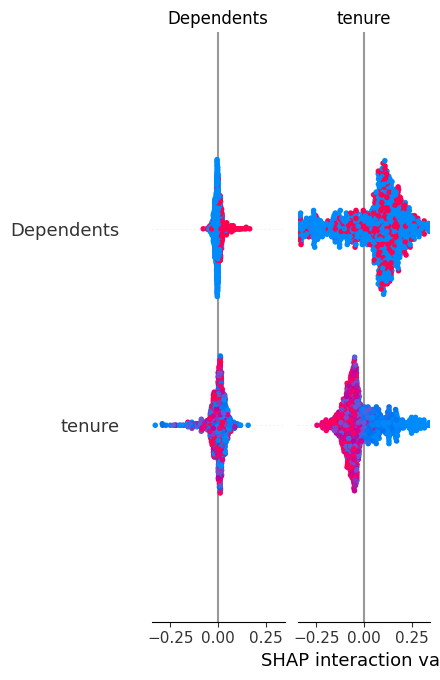

In [ ]:
# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan melatih model Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Prediksi pada data test
y_pred_test = rf_classifier.predict(X_test)

# Hitung F1-score pada data test
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')

# Hitung F1-score pada data train
y_pred_train = rf_classifier.predict(X_train)
f1_score_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"F1-score pada data train: {f1_score_train:.2f}")
print(f"F1-score pada data test: {f1_score_test:.2f}")

# SHAP values untuk data test
explainer = shap.TreeExplainer(rf_classifier)
shap_values_test = explainer.shap_values(X_test)

# Plot SHAP summary plot untuk data test
shap.summary_plot(shap_values_test, X_test, plot_type='bar')

- F1-score tinggi (0.99) menunjukkan model mampu dengan baik dalam memprediksi pada data latihan, namun tidak sempurna.

> Perbedaan F1-score yang signifikan antara training dan test mengindikasikan perluasan model untuk memperbaiki generalisasi.
Langkah selanjutnya termasuk penyetelan ulang model, penggunaan teknik regularisasi, dan eksplorasi interpretasi model untuk meningkatkan performa dan interpretabilitas.

# Kesimpulan

Berdasarkan informasi akun pelanggan, kita bisa lihat bahwa semakin lama nya pelanggan berlangganan dapat menaikan tingkat loyalitas mereka terhadap perusahaan. Lalu kita juga bisa menyimpulkan adanya sensitivitas pelanggan terhadap jumlah yang mereka harus bayarkan. Beberapa pelanggan ada yang membayar lebih dibandingkan oleh pelanggan yang memiliki total jumlah layanan yang sama. Ini dapat disebabkan oleh penyebaran promosi yang kurang baik.

Secara kesuluruhan, model yang dibangun memiliki kemampuan klasifikasi cukup baik dalam memprediksi dengan benar baik pelanggan yang akan churn maupun yang tidak dengan melihat F2 Score 71.72% dan nilai ROC_AUC sebesar 75.15%. Model dapat mengetahui 69 % pelanggan yang tidak churn dan 81% pelanggan yang akan churn (berdasarkan recall). Namun, model cukup berjuang dalam memprediksi dengan jumlah yang tepat pelanggan yang akan churn yang akan melakukan klaim sebesar 49% (berdasarkan precision) dikarenakan dataset imbalanced.

Berdasarkan contoh hitungan pada business overview, terlihat bahwa dengan menggunakan model, perusahaan dapat meminimumkan biaya promosi/retensi sebesar 25% dibandingkan skenario tidak menggunakan model.

# Saran 

Terkait Model

1. Penambahan data historis yang lebih lama, terutama customer yang churn agar mengurangi imbalance data yang signifikan
2. Model dapat ditingkatkan dengan melakukan tuning hyperparameter dengan nilai yang sudah didapat sebagai referensi dan menambahkan parameter lain
3. Pemilihan teknik resampling lain yang belum digunakan seperti ADASYN (Adaptive Synthetic)
4. Secara rutin pantau kinerja model dan perbarui dengan data untuk menjaga akurasi prediktifnya. Industri telekomunikasi dinamis, dan perilaku pelanggan dapat berubah seiring waktu, memengaruhi faktor-faktor yang mempengaruhi kemungkinan perpindahan.
5. Meskipun regresi logistik telah terbukti menjadi model terbaik sejauh ini, terus eksperimen dengan berbagai algoritma untuk melihat apakah model lain dapat menawarkan kinerja yang lebih baik.